In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import dataset

In [3]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Dropping ID as it has absolutely no impact.
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

# Data Pre-processing

In [7]:
# concat the data to perform data preprocessing on both dataset at the same time
df = pd.concat([df_train, df_test]).reset_index(drop=True).copy()

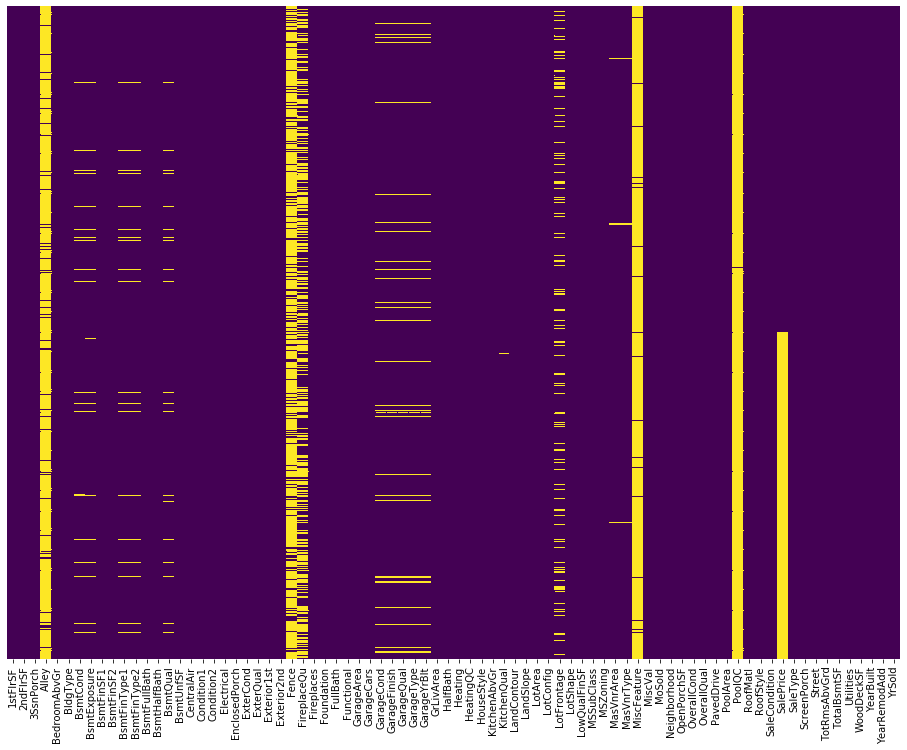

In [8]:
# heatmap for overall view for all variable
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

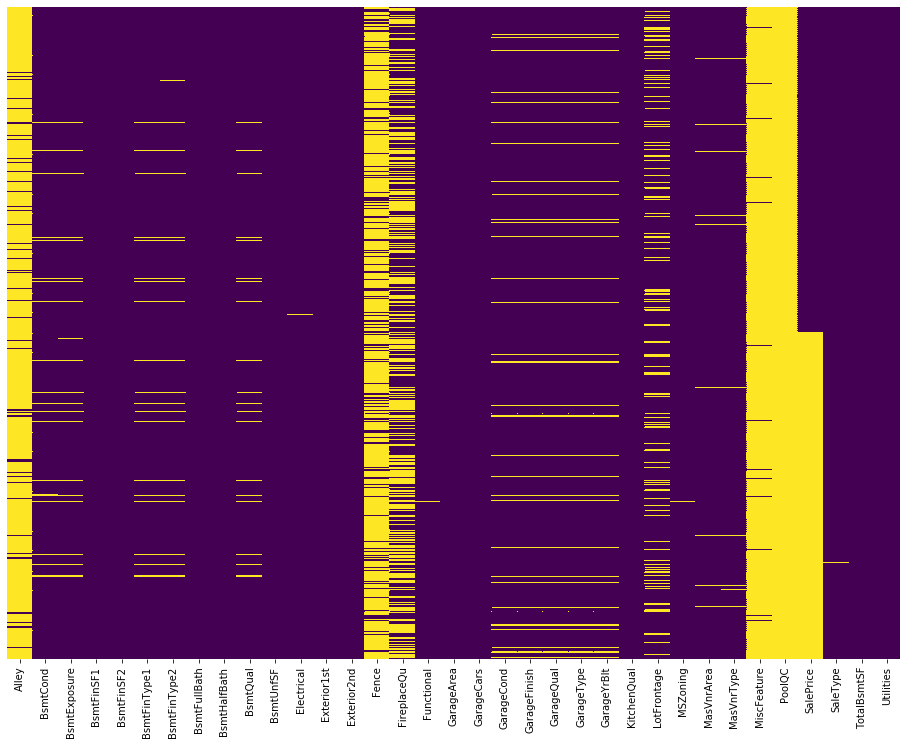

In [9]:
# heatmap for overall view for missing data only
f, ax = plt.subplots(figsize=(16, 12))
col_missing_data = df.columns[df.isnull().sum() > 0].tolist()
sns.heatmap(df[col_missing_data].isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [10]:
print(col_missing_data)

['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF', 'Utilities']


In [11]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [12]:
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [13]:
df[df['GarageQual'].isnull()][['GarageQual', 'GarageArea','GarageCars']]

,GarageQual,GarageArea,GarageCars
39,NaN,0.0,0.0
48,NaN,0.0,0.0
78,NaN,0.0,0.0
88,NaN,0.0,0.0
89,NaN,0.0,0.0
...,...,...,...
2893,NaN,0.0,0.0
2909,NaN,0.0,0.0
2913,NaN,0.0,0.0
2914,NaN,0.0,0.0


In [14]:
df[df['GarageArea'].isnull() | df['GarageCars'].isnull()][['GarageQual', 'GarageArea','GarageCars']]

,GarageQual,GarageArea,GarageCars
2576,NaN,NaN,NaN


In [15]:
df[df['TotalBsmtSF'].isnull()][['BsmtCond','TotalBsmtSF']]

,BsmtCond,TotalBsmtSF
2120,NaN,NaN


In [16]:
## Data are filled based on Domain knowledge
Fill_with_none = ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                  'BsmtFinType2', 'BsmtQual', 'Fence', 'FireplaceQu',
                  'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
                  'MiscFeature', 'PoolQC', 'MasVnrType', 'Exterior2nd'
                 ] 

Fill_with_zero = [ 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  'BsmtFullBath', 'BsmtHalfBath','GarageArea', 'GarageCars', 
                  'GarageYrBlt', 'MasVnrArea', 'LotFrontage'
                 ]

Fill_with_mode = [ 'Electrical', 'Exterior1st',  'Functional', 
                  'KitchenQual',  'MSZoning', 'SaleType', 'Utilities'
                 ]

for col in Fill_with_none:
    df[col].fillna("None", inplace=True)
    df_test[col].fillna("None", inplace=True)
    df_train[col].fillna("None", inplace=True)

for col in Fill_with_zero:
    df[col].fillna(0, inplace=True)
    df_test[col].fillna(0, inplace=True)
    df_train[col].fillna(0, inplace=True)

for col in Fill_with_mode:
    mode = df[col].value_counts().idxmax()
    df[col].fillna(mode, inplace=True)
    df_test[col].fillna(mode, inplace=True)
    df_train[col].fillna(mode, inplace=True)

df.columns[df.isnull().sum() > 0].tolist()

['SalePrice']

# Exploratory Data Analysis

## Numerical

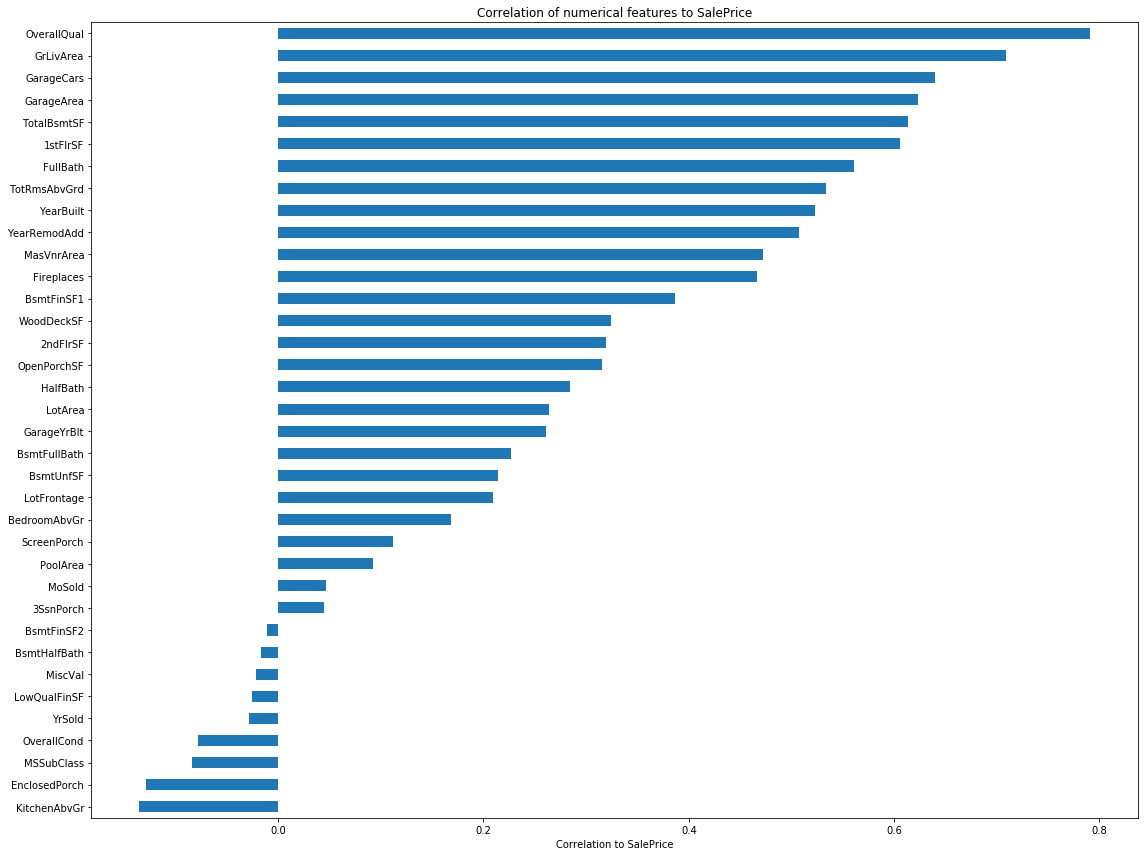

In [17]:
# Correlation plot of numerical features against saleprice
plt.figure(figsize=(16,12));
corr = df_train.corr()['SalePrice']
corr.sort_values(ascending=True)[:-1].plot(kind="barh")

plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

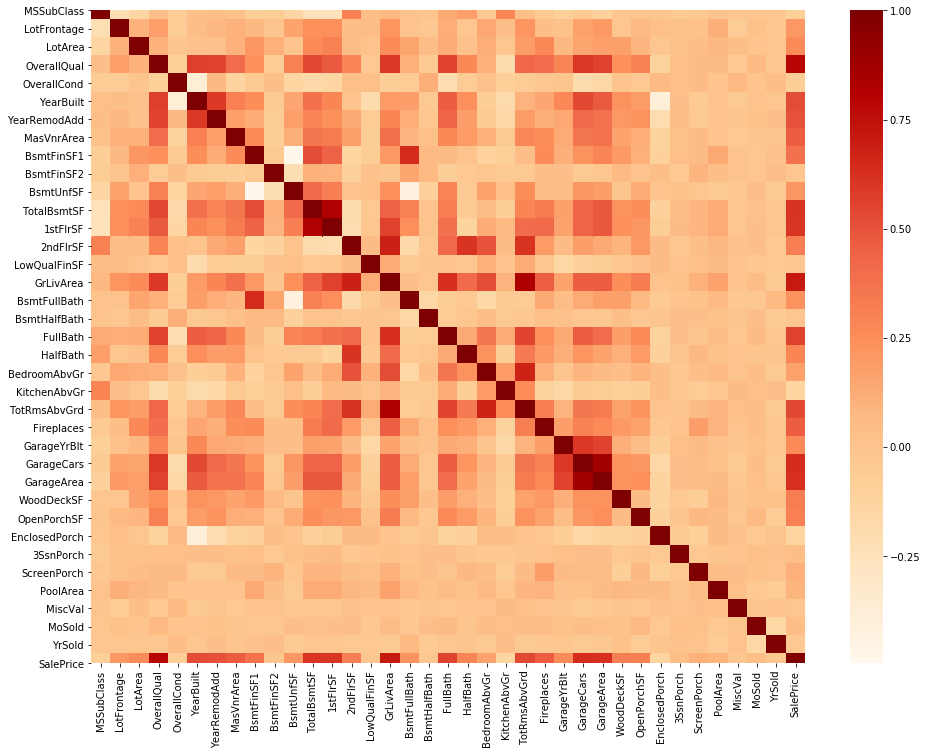

In [18]:
# Correlation plot of numerical features against saleprice (heatmap)
plt.figure(figsize=(16,12));
sns.heatmap(df_train.corr(), cmap = 'OrRd')

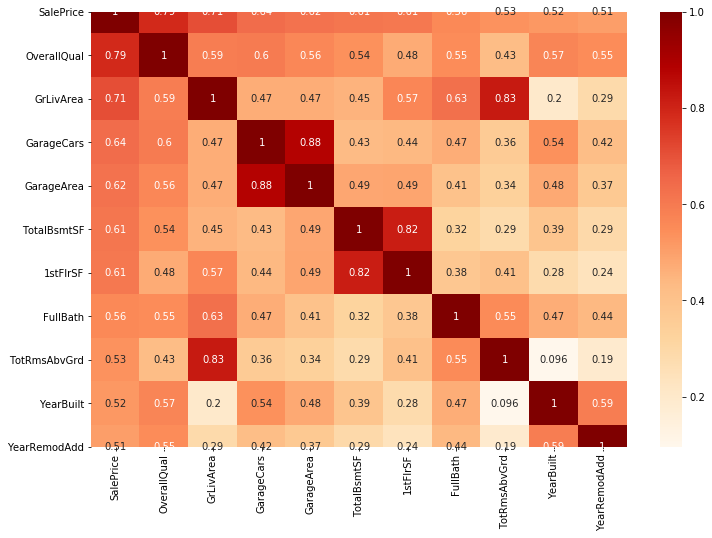

In [19]:
# Highly correlated features plot of numerical features against saleprice (heatmap)
high_corr = df_train.corr()['SalePrice'][(abs(df_train.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)

plt.figure(figsize=(12,8));
sns.heatmap(df_train[high_corr.index].corr(), annot=True, cbar=True, cmap = 'OrRd')

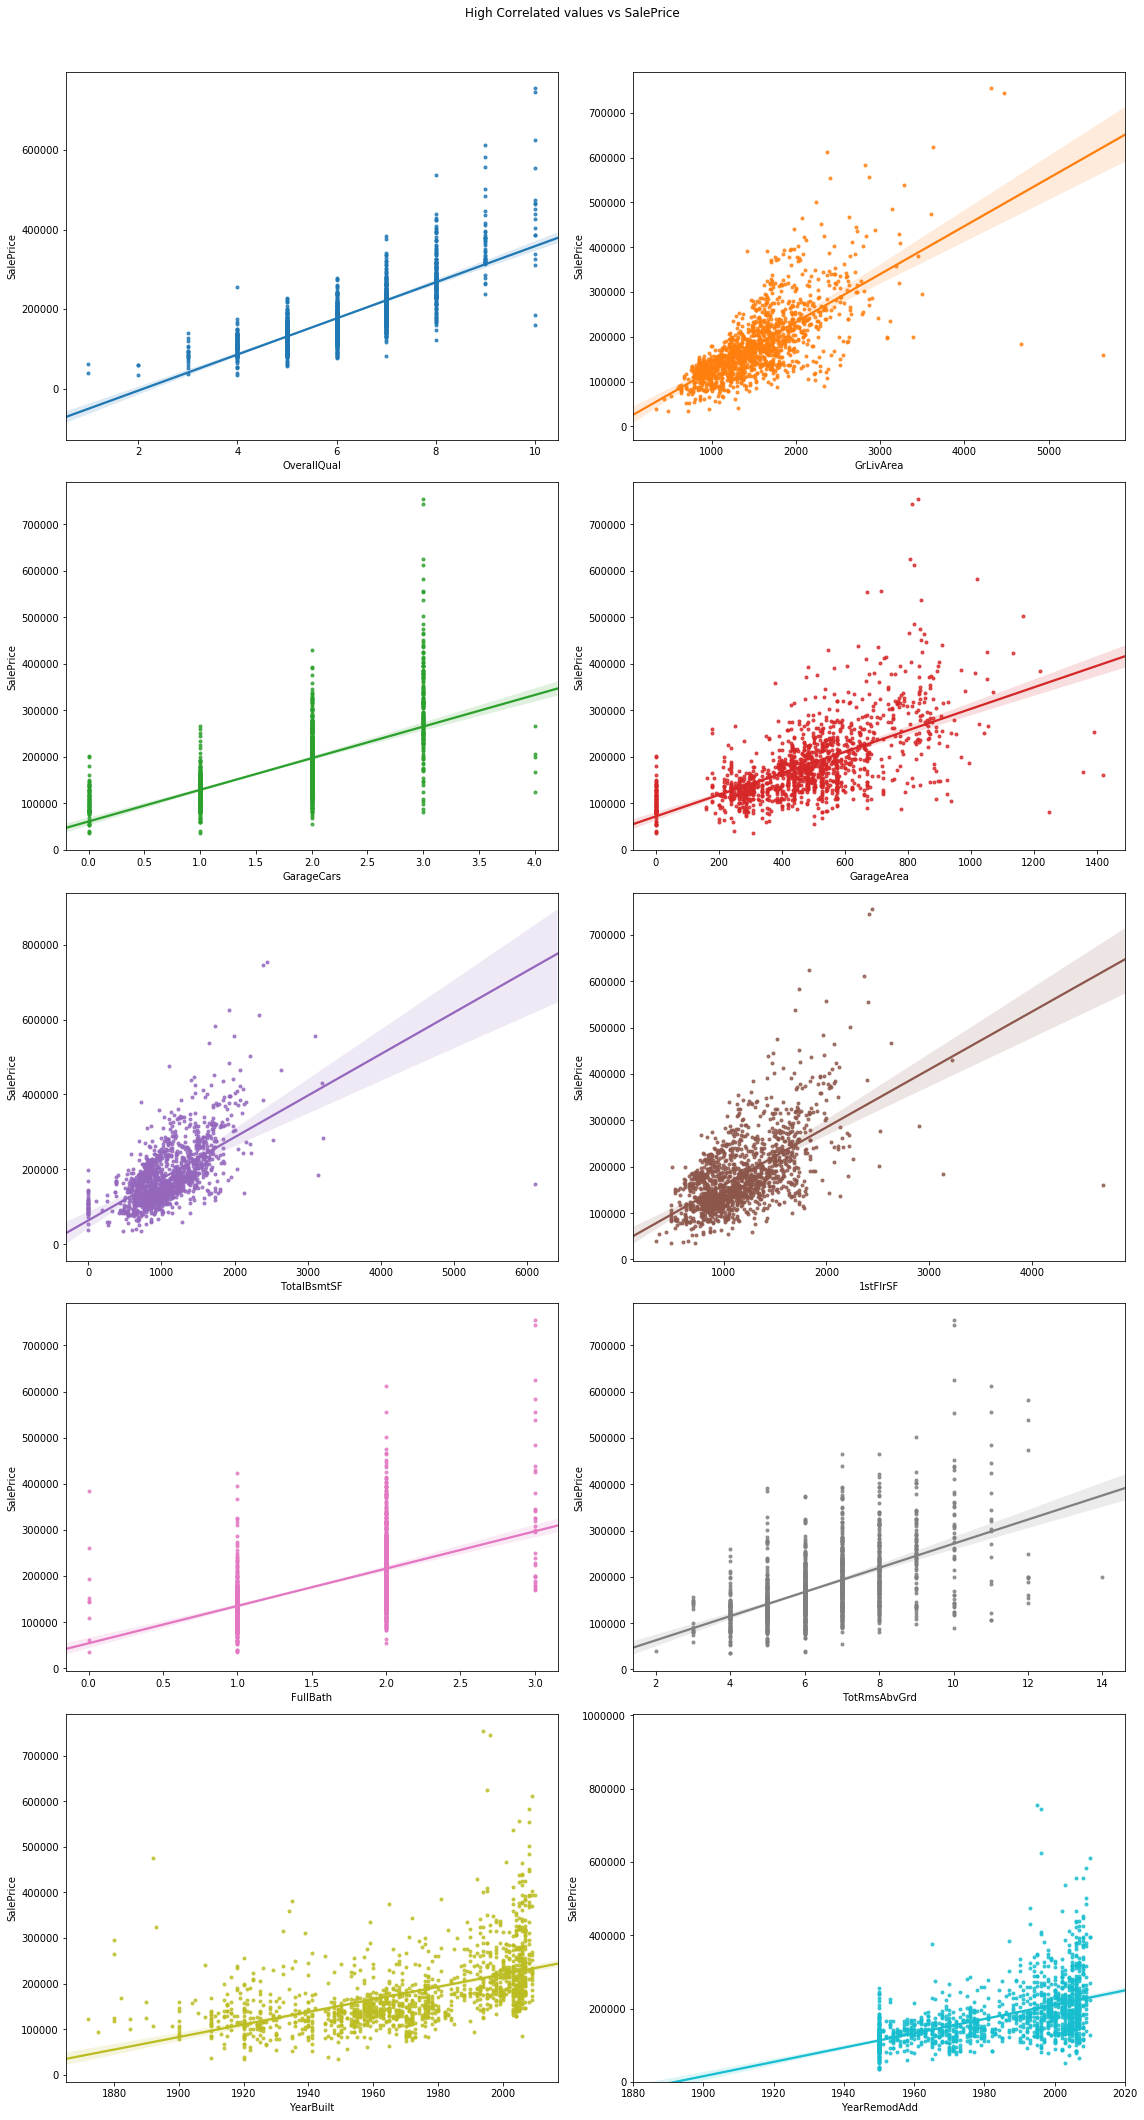

In [20]:
# Linear Regression plot of top 10 correlated features against saleprice 
fig, ax = plt.subplots(5, 2, figsize=(16,30))

for idx,col in enumerate(high_corr[1:].index):
    sns.regplot(x=df_train[col], y=df_train["SalePrice"], marker='.', ax=ax[idx//2, idx%2]) 

ax[4,1].set_ylim(0,)
ax[4,1].set_xlim(1880, 2020)

fig.suptitle('High Correlated values vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

In [21]:
#select all numerical features
df_numerical = df_train.select_dtypes("number")
num_list = df_numerical.columns.tolist()

In [22]:
# remove the highly correlated features from the list(it has been plot before)
for feat in high_corr.index.tolist():
    num_list.remove(feat)

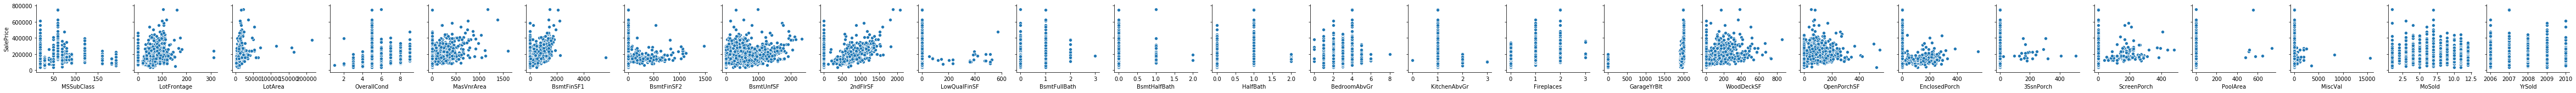

In [23]:
#pairplot for the rest of the numerical features (double click on diagram to enlarge)
sns.pairplot(data=df_train, x_vars=num_list, y_vars = "SalePrice")

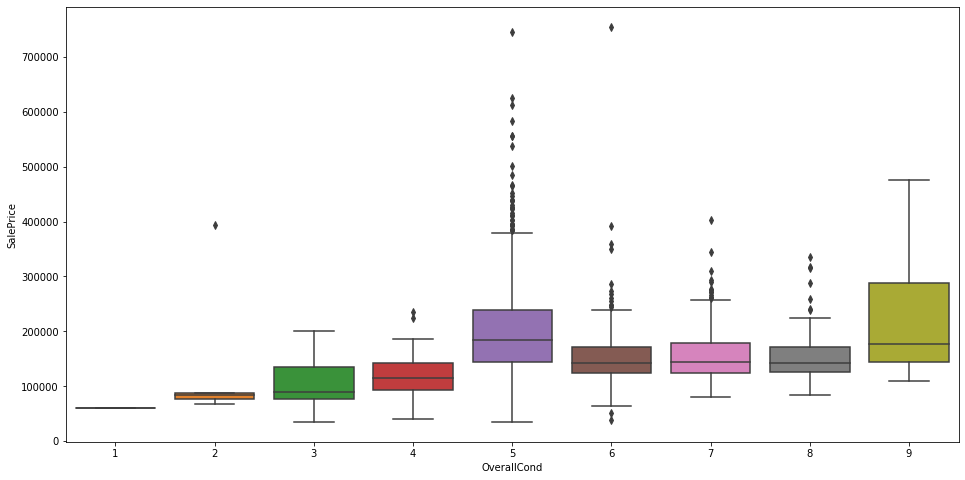

In [24]:
# Boxplot of overallcond as it has surprisingly low correlation which is unexpected.
plt.figure(figsize=(16,8));
sns.boxplot(x=df_train['OverallCond'], y=df_train['SalePrice'])

## Categorical

In [25]:
cat_col = df_train.select_dtypes(exclude=np.number).columns.tolist()
print(cat_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


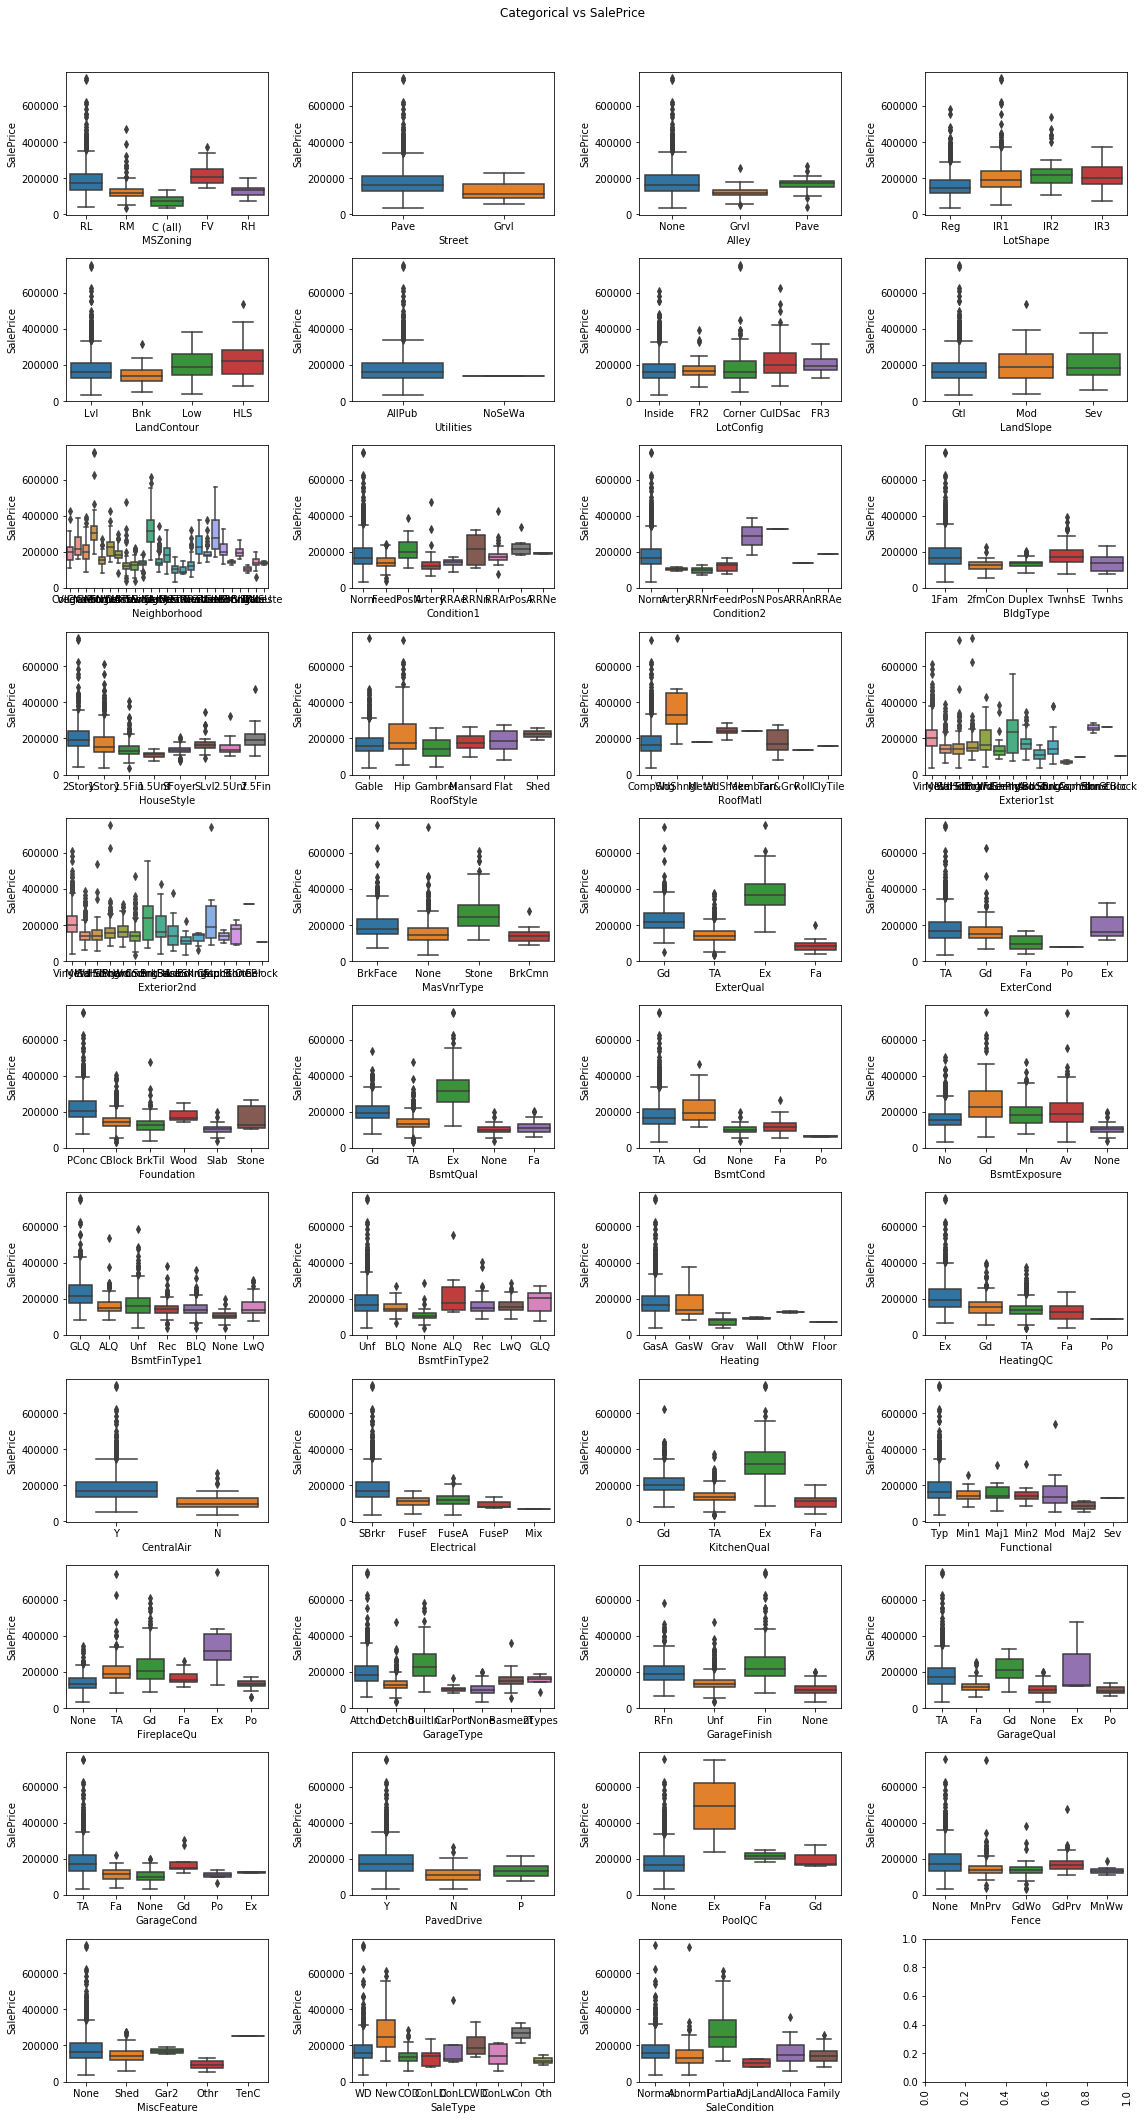

In [26]:
# Boxplot of all categorical variables to visualize the distributions.
fig, ax = plt.subplots(11, 4, figsize=(16,30))

for idx,col in enumerate(cat_col):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx//4, idx%4]) 
plt.xticks(rotation=90)
fig.suptitle('Categorical vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

### Road Conditions

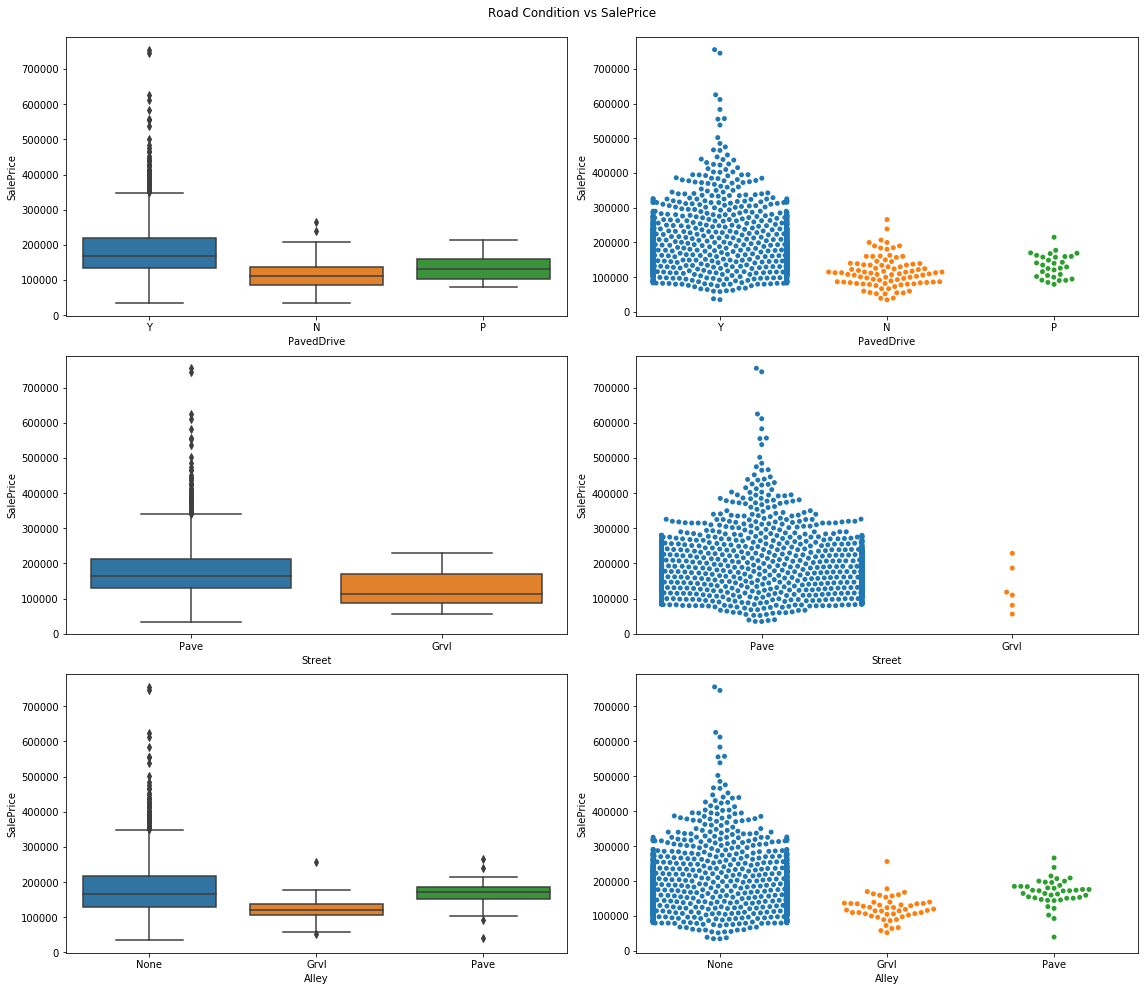

In [27]:
# Boxplot of certain categorical variables to identify similar relationship for feature engineering.
fig, ax = plt.subplots(3, 2, figsize=(16,14))

Paved = ['PavedDrive', 'Street', 'Alley']

for idx,col in enumerate(Paved):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 0]) 
    sns.swarmplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 1]) 

fig.suptitle('Road Condition vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

### Lot Condition

<Figure size 1152x576 with 0 Axes>

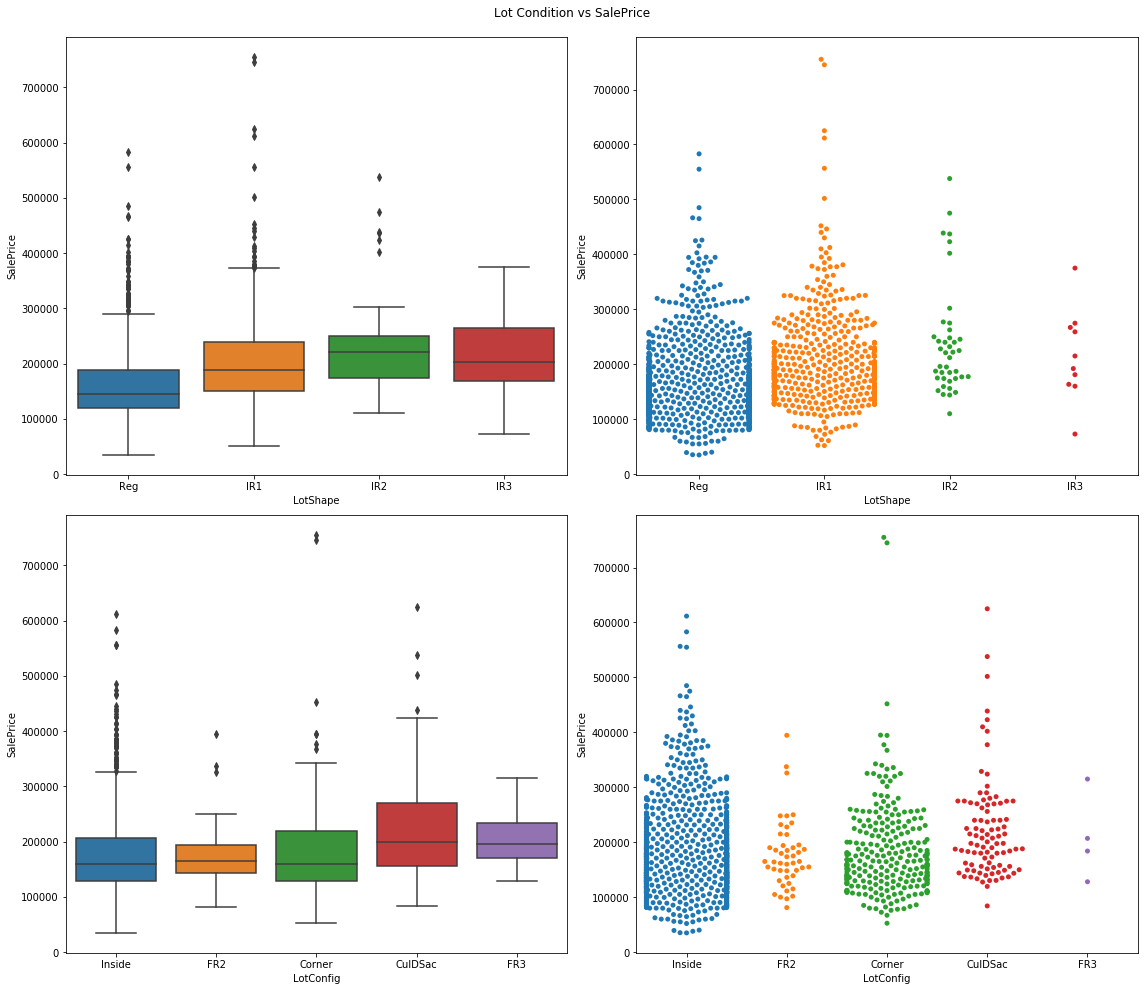

In [28]:
# Boxplot of certain categorical variables to identify similar relationship for feature engineering.
plt.figure(figsize=(16,8));

fig, ax = plt.subplots(2, 2, figsize=(16,14))

Lot = ['LotShape', 'LotConfig']
 
for idx,col in enumerate(Lot):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 0]) 
    sns.swarmplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 1]) 

fig.suptitle('Lot Condition vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

### Garage

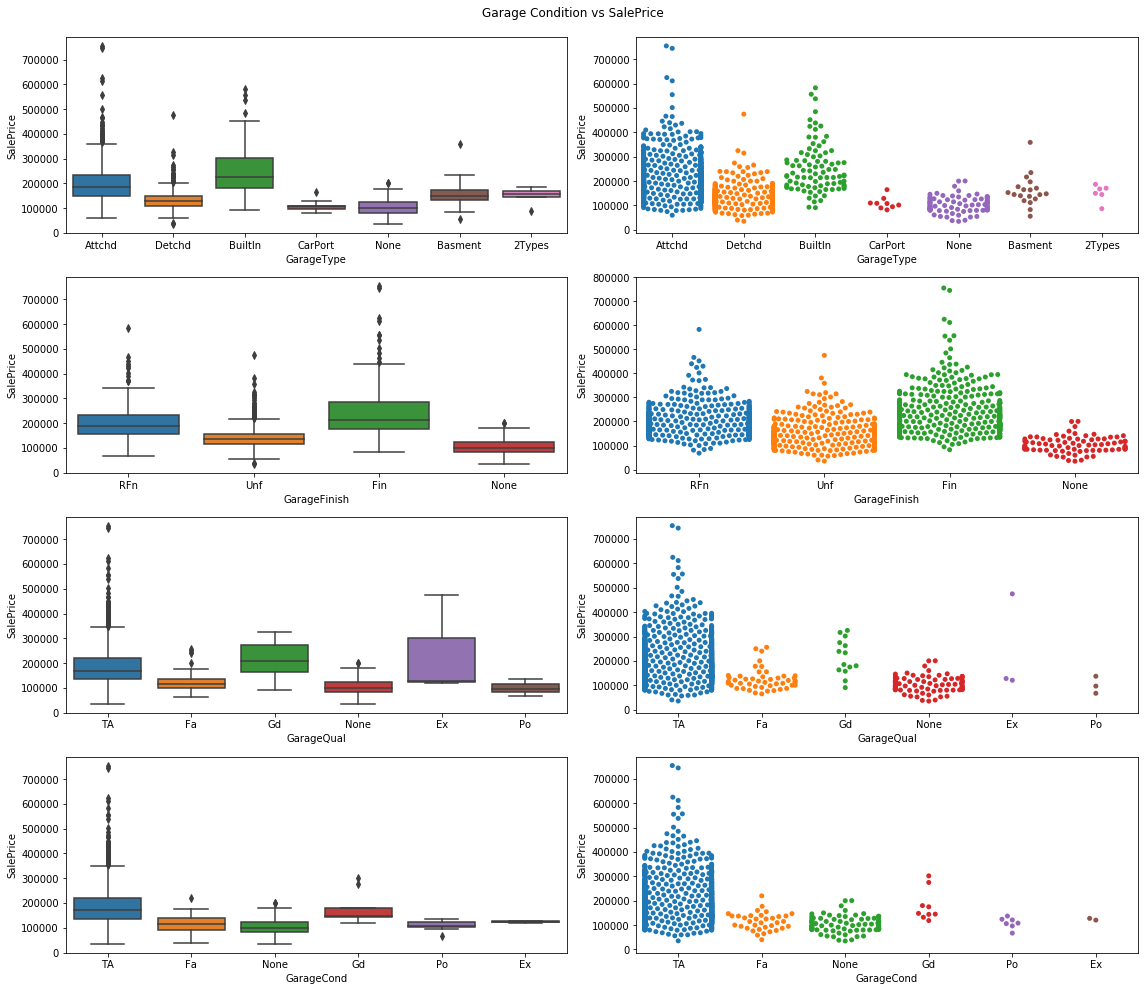

In [29]:
# Boxplot of certain categorical variables to identify similar relationship for feature engineering.
fig, ax = plt.subplots(4, 2, figsize=(16,14))

Garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for idx,col in enumerate(Garage):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 0]) 
    sns.swarmplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 1]) 

fig.suptitle('Garage Condition vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

### Basement

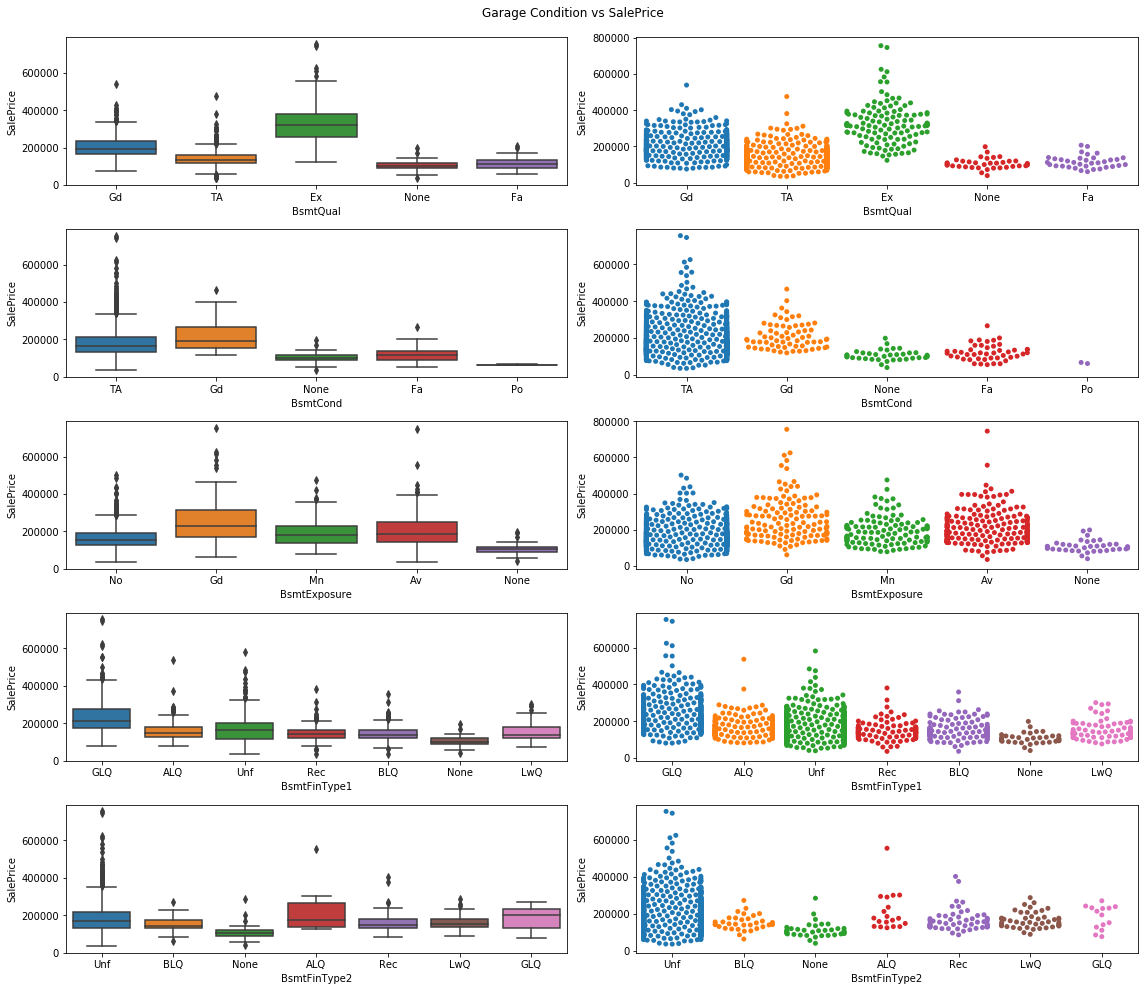

In [30]:
# Boxplot of certain categorical variables to identify similar relationship for feature engineering.
fig, ax = plt.subplots(5, 2, figsize=(16,14))

Basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for idx,col in enumerate(Basement):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 0]) 
    sns.swarmplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx, 1]) 

fig.suptitle('Basement Condition vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

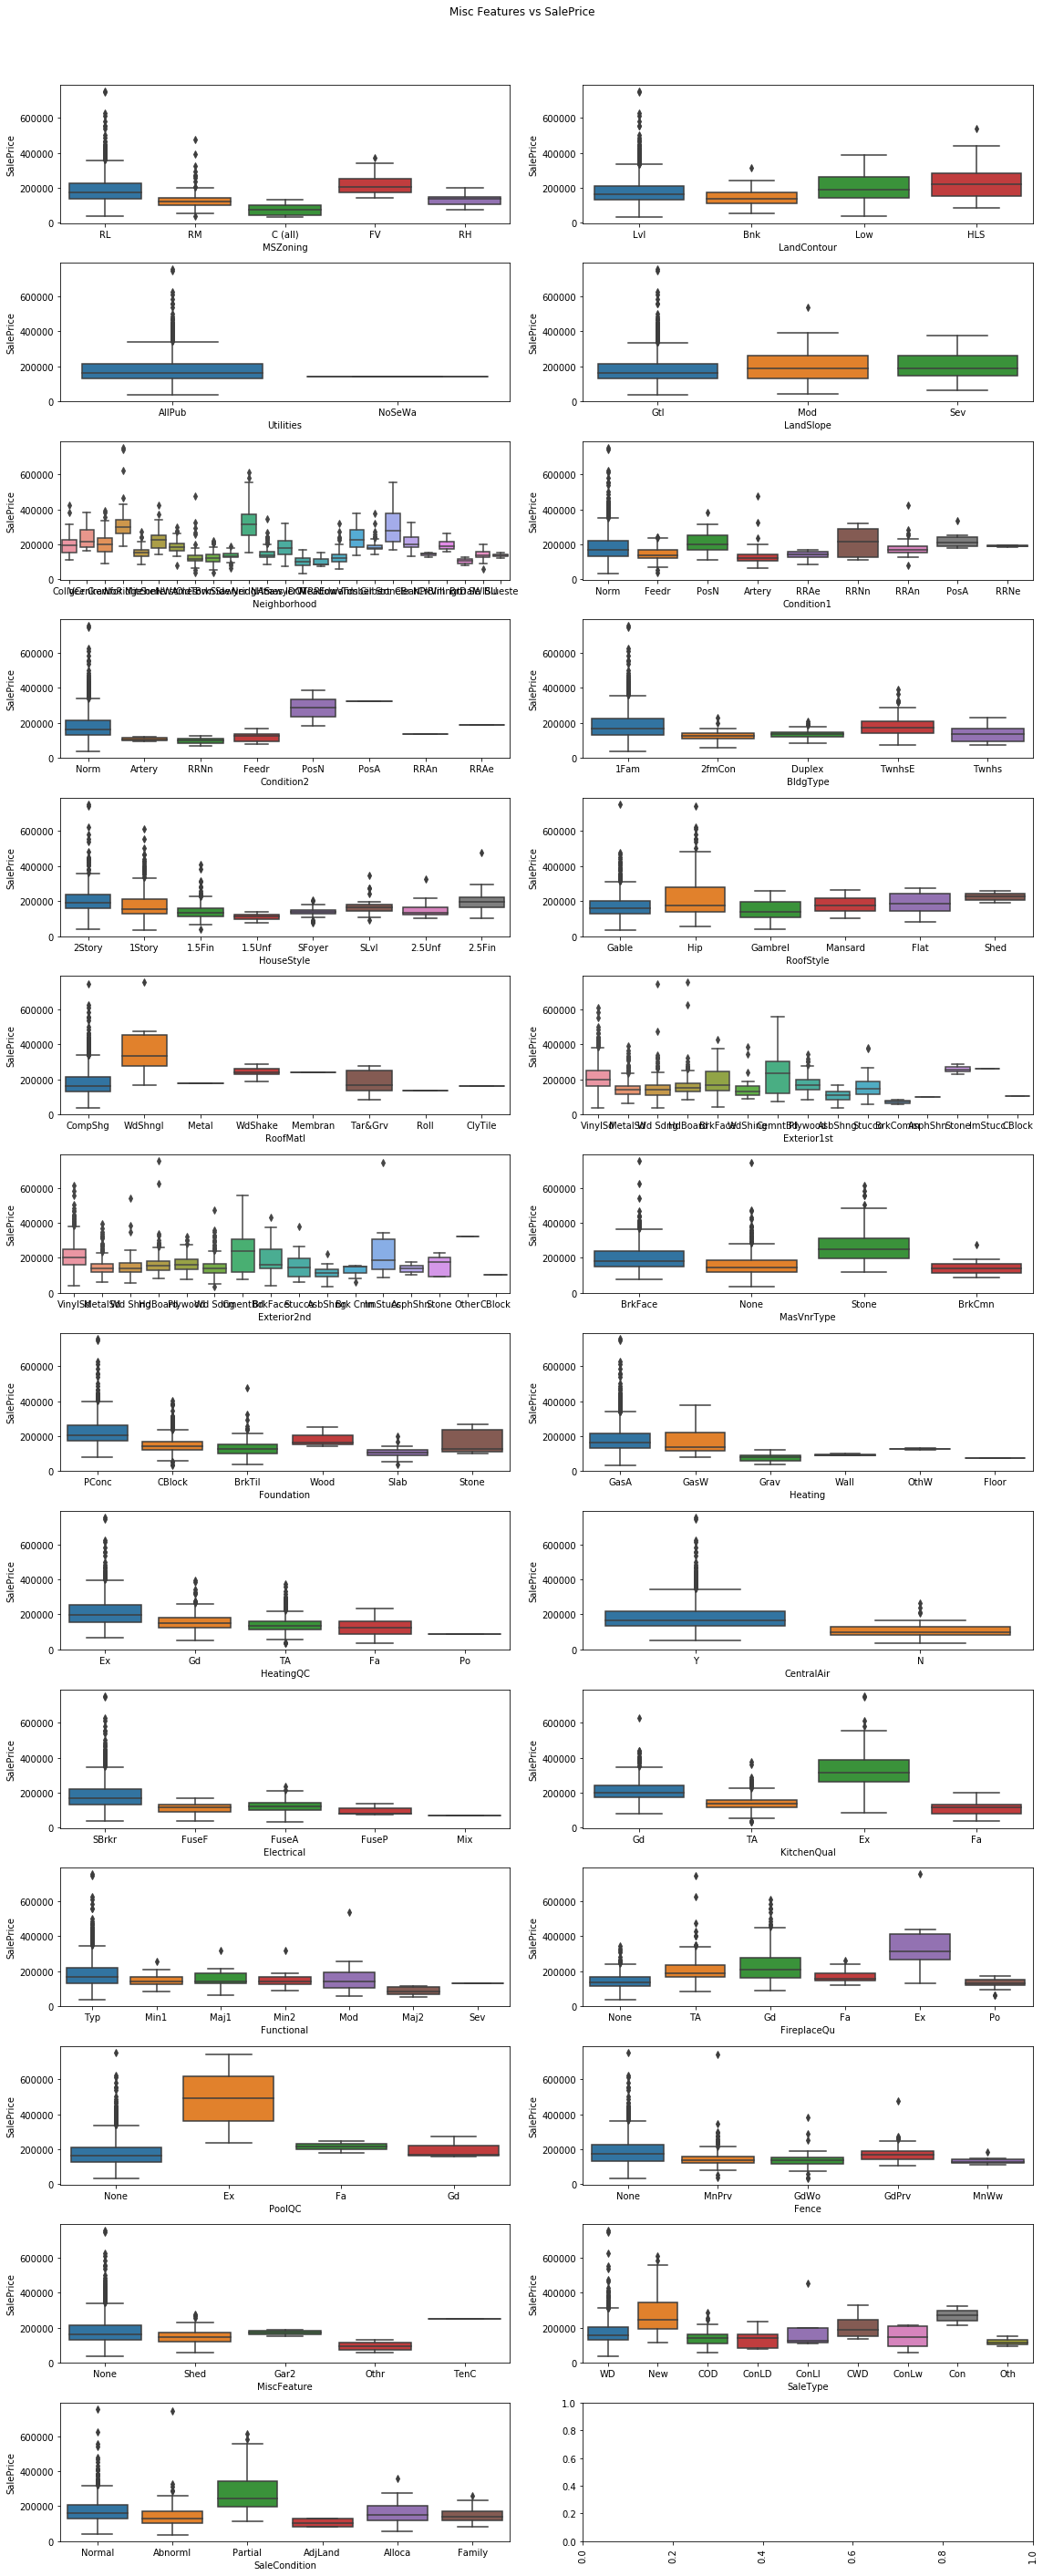

In [31]:
# Boxplot of misc categorical variables to identify similar relationship for feature engineering.
fig, ax = plt.subplots(14, 2, figsize=(16,40))

Misc = ['MSZoning', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 
     'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
     'Exterior1st', 'Exterior2nd', 'MasVnrType',  'Foundation', 'Heating', 
     'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
     'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for idx,col in enumerate(Misc):
    sns.boxplot(x=df_train[col], y=df_train["SalePrice"], ax=ax[idx//2, idx%2]) 
    plt.xticks(rotation=90)
fig.suptitle('Misc Features vs SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

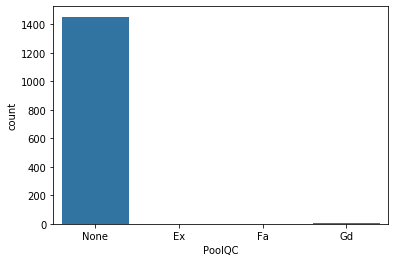

In [32]:
# Countplot to see the distribution of poolqc
sns.countplot(df_train['PoolQC'])

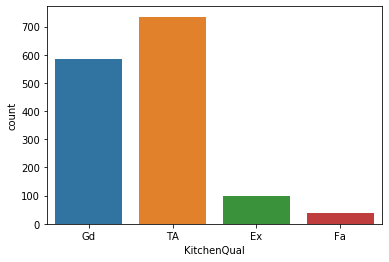

In [33]:
# Countplot to see the distribution of kitchenqual
sns.countplot(df_train['KitchenQual'])

##### Porch

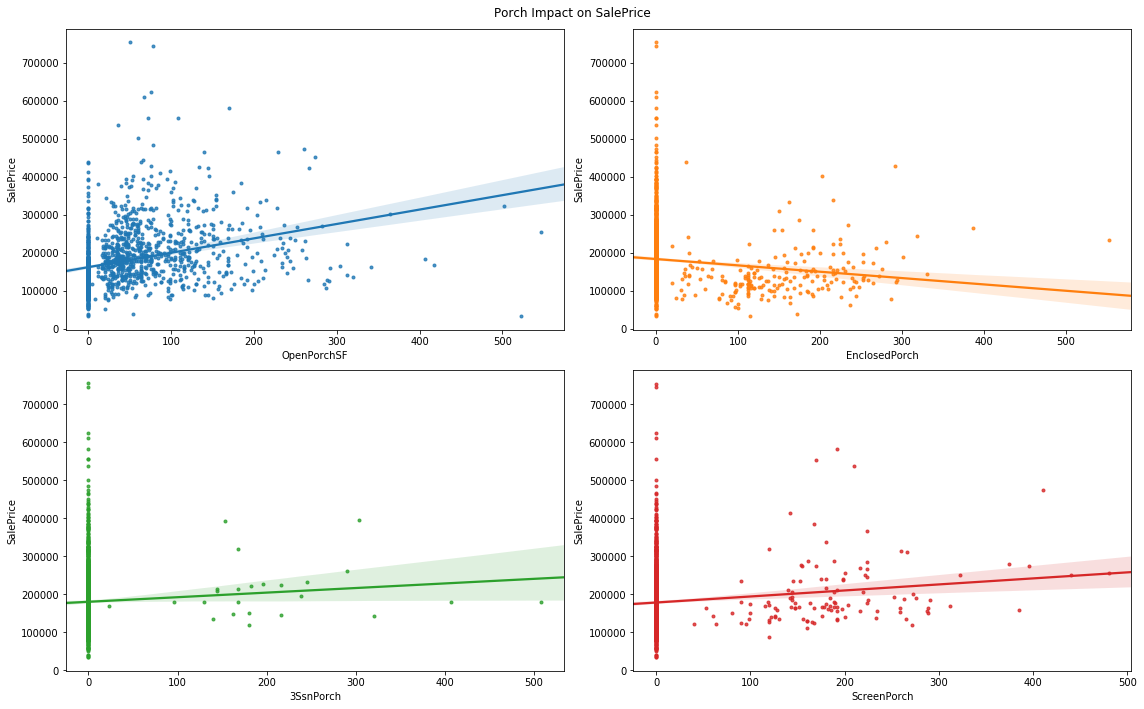

In [34]:
#linear regression plot on similar features to gain insights for feature engineering
porchs = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

fig, ax = plt.subplots(2, 2, figsize=(16,10))

numerical = df_train.select_dtypes(include=np.number).columns.tolist()
for idx,col in enumerate(porchs):
    sns.regplot(x=df_train[col], y=df_train["SalePrice"], marker='.', ax=ax[idx//2, idx%2])  

fig.suptitle('Porch Impact on SalePrice')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

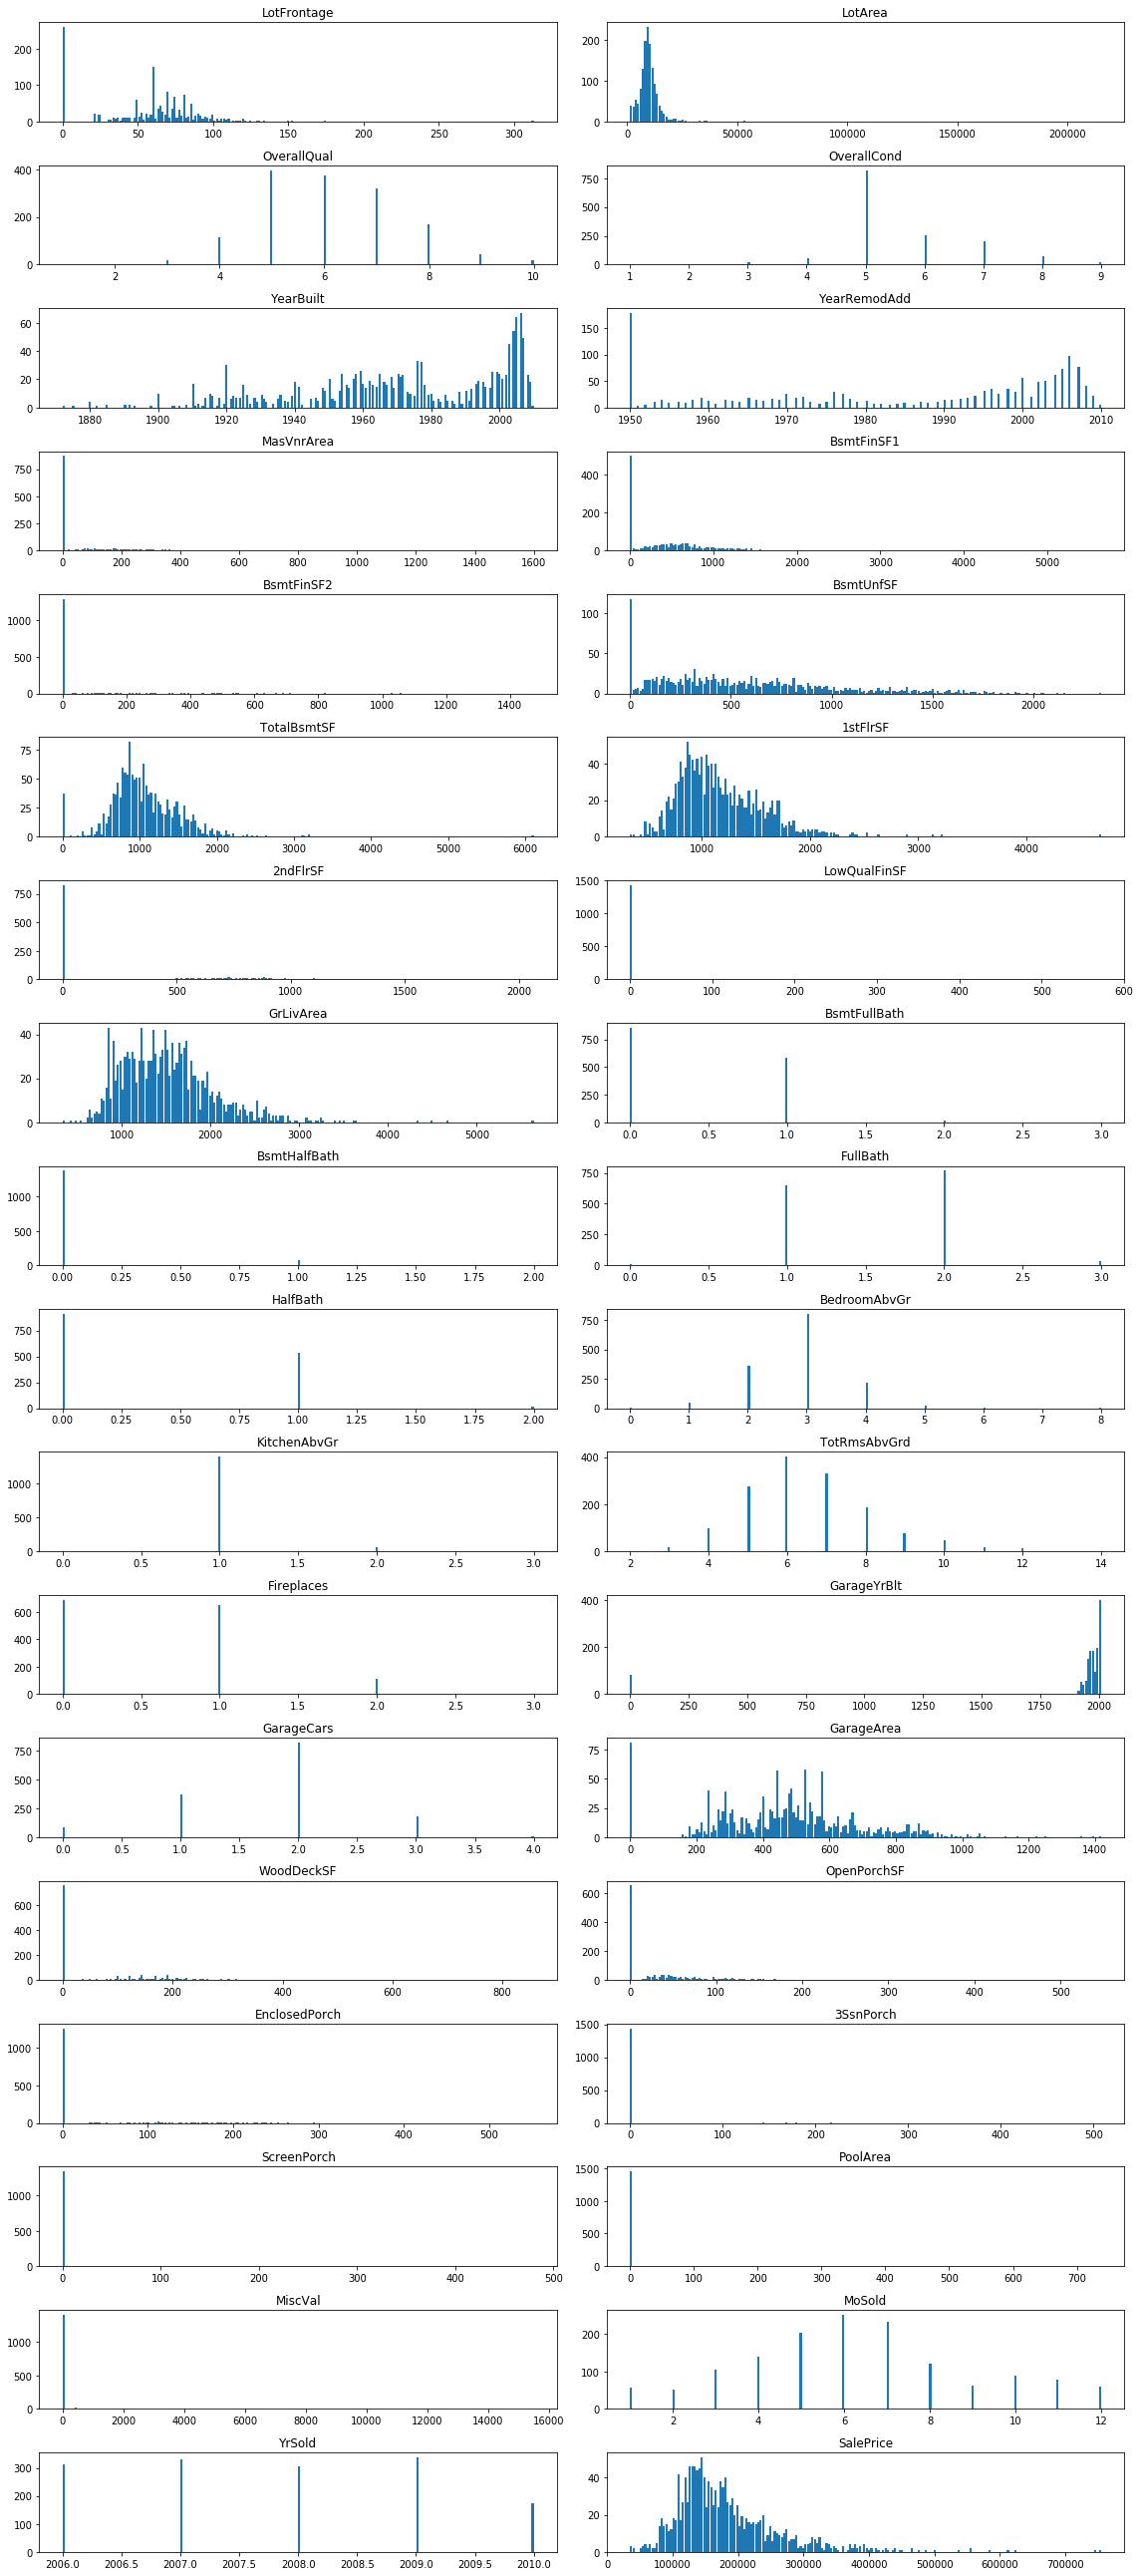

In [35]:
#histogram plot on numerical features to understand the distributions
fig, axes = plt.subplots(nrows=18, ncols=2, figsize=(16,36))

for idx, col in enumerate(df_numerical.columns[1:]):
    df_numerical[col].plot(kind="hist", bins=200, rwidth=.9, title=col, ax=axes[idx//2, idx%2])
    ax=axes[idx//2, idx%2].yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

## Sale Price Analysis

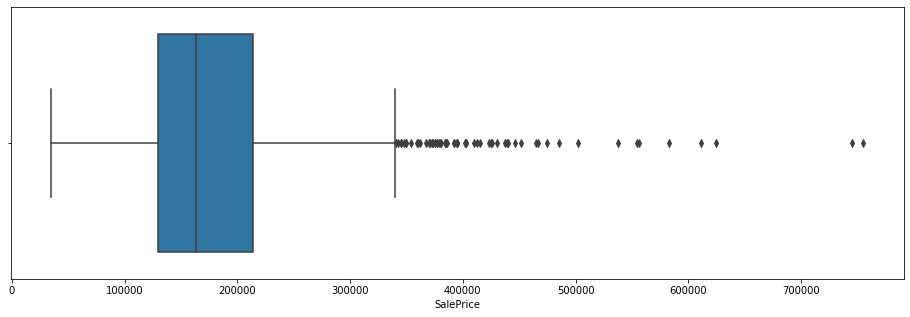

In [36]:
#box plot of saleprice to understand distribution of saleprice
f, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(df['SalePrice'])

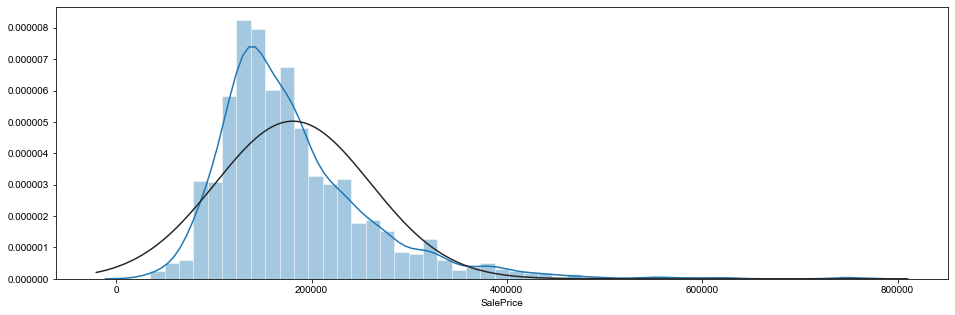

In [37]:
#distribution plot of saleprice to understand distribution of saleprice

f, ax = plt.subplots(figsize=(16, 5))
sns.set_style('whitegrid')
sns.distplot(df_train["SalePrice"],fit=norm)

Text(0.5, 1.0, 'Probability plot: SalePrice')

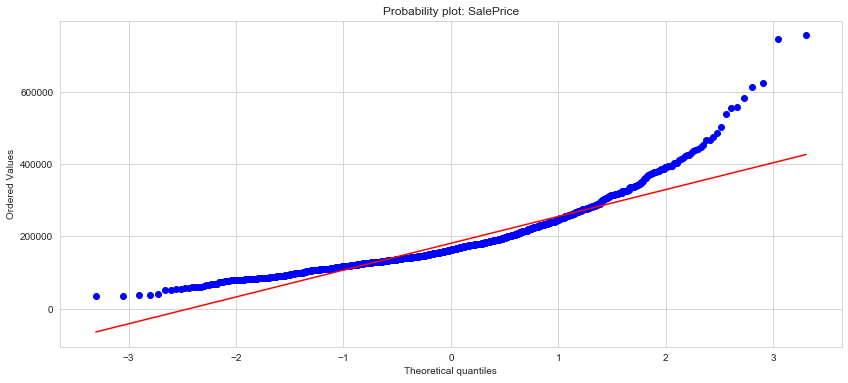

In [38]:
#QQ plot of saleprice to compare empirical distribution vs theorical distribution

plt.figure(figsize=(14,6))
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Probability plot: SalePrice")

In [39]:
# calculate percentiles and IQR
q25 = np.percentile(df_train.SalePrice, 25)
q75 = np.percentile(df_train.SalePrice, 75)
iqr = q75 - q25

# calculate normal and extreme upper and lower cut off
cut_off = iqr * 3
lower_extreme_outlier = q25 - cut_off 
upper_extreme_outlier = q75 + cut_off

print(f'Percentiles:\n25th  =  {q25}\n75th  =  {q75}\n\nIQR   =   {iqr}\nlower = {lower_extreme_outlier}\nupper =  {upper_extreme_outlier}')

Percentiles:
25th  =  129975.0
75th  =  214000.0

IQR   =   84025.0
lower = -122100.0
upper =  466075.0


In [40]:
#see the extreme outliers
df_train[df_train.SalePrice > upper_extreme_outlier]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,20,RL,63.0,17423,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,None,None,None,0,7,2009,New,Partial,501837
185,75,RM,90.0,22950,Pave,None,IR2,Lvl,AllPub,Inside,...,0,None,GdPrv,None,0,6,2006,WD,Normal,475000
440,20,RL,105.0,15431,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2009,WD,Normal,555000
691,60,RL,104.0,21535,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,1,2007,WD,Normal,755000
769,60,RL,47.0,53504,Pave,None,IR2,HLS,AllPub,CulDSac,...,0,None,None,None,0,6,2010,WD,Normal,538000
798,60,RL,104.0,13518,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,7,2009,New,Partial,485000
803,60,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,1,2009,New,Partial,582933
898,20,RL,100.0,12919,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,3,2010,New,Partial,611657
1046,60,RL,85.0,16056,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,7,2006,New,Partial,556581
1169,60,RL,118.0,35760,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,None,None,None,0,7,2006,WD,Normal,625000


In [41]:
#print kurtosis and skeness values
print("SalePrice:")
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

SalePrice:
Skewness: 1.882876
Kurtosis: 6.536282


In [42]:
#print kurtosis and skeness values after log transformation
LogSalePrice = df_train["SalePrice"].apply(np.log)
LogSalePrice.name = 'LogSalePrice'
print("Log SalePrice:")
print("Skewness: %f" % LogSalePrice.skew())
print("Kurtosis: %f" % LogSalePrice.kurt())

Log SalePrice:
Skewness: 0.121335
Kurtosis: 0.809532


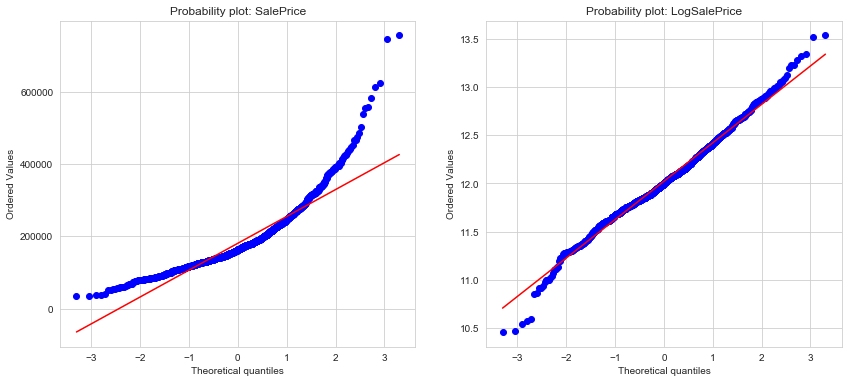

In [43]:
#QQ plot comparison of before and after log transformation
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Probability plot: SalePrice")

plt.subplot(1, 2, 2)
stats.probplot(LogSalePrice, plot=plt)
plt.title("Probability plot: LogSalePrice")
plt.show()

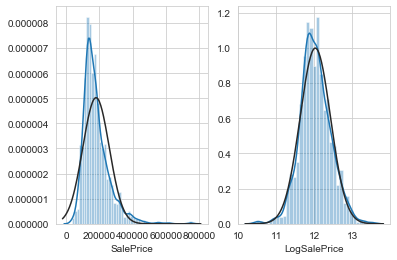

In [44]:
#distribution plot comparison of before and after log transformation
plt.subplot(1, 2, 1)
sns.set_style('whitegrid')
sns.distplot(df_train["SalePrice"],fit=norm)

plt.subplot(1, 2, 2)
sns.set_style('whitegrid')
sns.distplot(LogSalePrice,fit=norm)

In [45]:
#describes saleprice statistically
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Data Pre-processing

## Encoding

In [46]:
categoricals = df.select_dtypes(exclude=np.number).columns.tolist()
print(categoricals)

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [47]:
# features that are nominal
Norminal = ['MSZoning',  'LandContour', 'Heating',  'Electrical',  
            'LotConfig',  'Neighborhood', 'Condition1', 'Condition2', 
            'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',  
            'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

In [48]:
# features that are ordinal
Ordinal = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 
           'BsmtFinType1', 'LandSlope', 'LotShape', 'PavedDrive', 
           'PoolQC', 'KitchenQual', 'Street', 'Alley', 
           'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond', 
           'GarageFinish', 'Fence', 'Utilities', 'CentralAir',
           'ExterQual', 'ExterCond', 'Functional']

### Ordinal

In [49]:
# manual label encoding for features that are ordinal
for col in ['KitchenQual', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageCond', 'GarageQual']:
    df[col] = df[col].replace(['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], np.arange(0,6).tolist()).astype(int)

for col in ['ExterQual', 'ExterCond', 'HeatingQC']:
    df[col] = df[col].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], np.arange(0,5).tolist()).astype(int)

for col in ['BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].replace(['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], np.arange(0,7).tolist()).astype(int)
    
df['Street'] = df.Street.replace(['Grvl', 'Pave'], np.arange(0,2).tolist()).astype(int)
df['Alley'] = df.Alley.replace(['None', 'Grvl', 'Pave'], np.arange(0,3).tolist()).astype(int)
df['PoolQC'] = df.PoolQC.replace(['None', 'Fa', 'TA', 'Gd', 'Ex'], np.arange(0,5).tolist()).astype(int)
df['Functional'] = df.Functional.replace(['None', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], np.arange(0,9).tolist()).astype(int)
df['BsmtExposure'] = df.BsmtExposure.replace(['None', 'No', 'Mn', 'Av', 'Gd'], np.arange(0,5).tolist()).astype(int)
df['Fence'] = df.Fence.replace(['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], np.arange(0,5).tolist()).astype(int)
df['Utilities'] = df.Utilities.replace(['None', 'ELO', 'NoSeWa', 'NoSewr', 'AllPub'], np.arange(0,5).tolist()).astype(int)
df['CentralAir'] = df.CentralAir.replace(['N', 'Y'], np.arange(0,2).tolist()).astype(int)
df['PavedDrive'] = df.PavedDrive.replace(['N', 'P', 'Y'], [0, 1, 2]).astype(int)
df['GarageFinish'] = df.GarageFinish.replace(['None', 'Unf', 'RFn', 'Fin'], np.arange(0,4).tolist()).astype(int)

df['LandContour'] = df.LandContour.replace(['Low', 'HLS' , 'Bnk', 'Lvl'], np.arange(0,4).tolist()).astype(int)
df['LandSlope'] = df.LandSlope.replace(['Sev', 'Mod', 'Gtl'], np.arange(0,3).tolist()).astype(int)
df['LotShape'] = df.LotShape.replace(['IR3', 'IR2', 'IR1', 'Reg'], np.arange(0,4).tolist()).astype(int)

In [50]:
categoricals = df.select_dtypes(exclude=np.number).columns.tolist()
print(categoricals)

['BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle', 'LotConfig', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType']


In [51]:
[value for value in Ordinal if value in categoricals] 

[]

### Norminal

In [52]:
# one-hot encoding for features that are nominal using pd.get_dummies
for category in categoricals:
    dummy = pd.get_dummies(df[category], prefix = category)
    df = pd.concat([df, dummy], axis = 1)
    df.drop(category, axis=1, inplace=True)

In [53]:
df.select_dtypes(exclude=np.number).columns.tolist()

[]

# Feature Engineering

In [54]:
# checking the highly correlated features after data encoding
high_corr = df.corr()['SalePrice'][(abs(df.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)
high_corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.585207
FullBath        0.560664
GarageFinish    0.549247
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

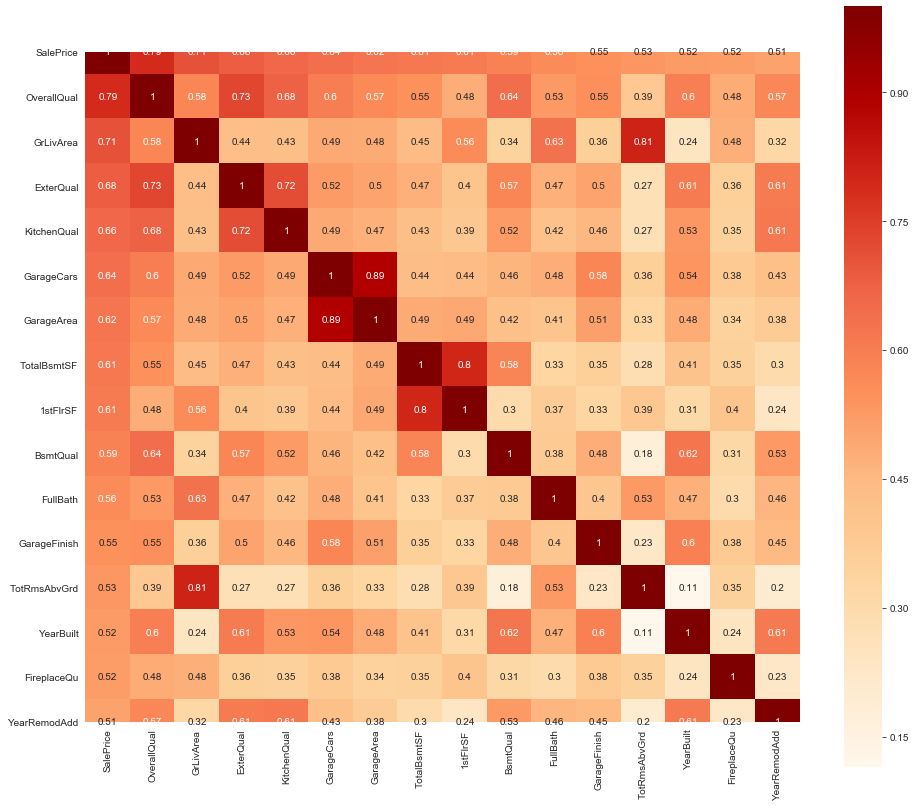

In [55]:
# visualizing the highly correlated features after data encoding using heatmap
fig, axes = plt.subplots(figsize=(16,14))
sns.heatmap(df[high_corr.index].corr(), cbar=True, annot=True, cmap = 'OrRd', square=True)

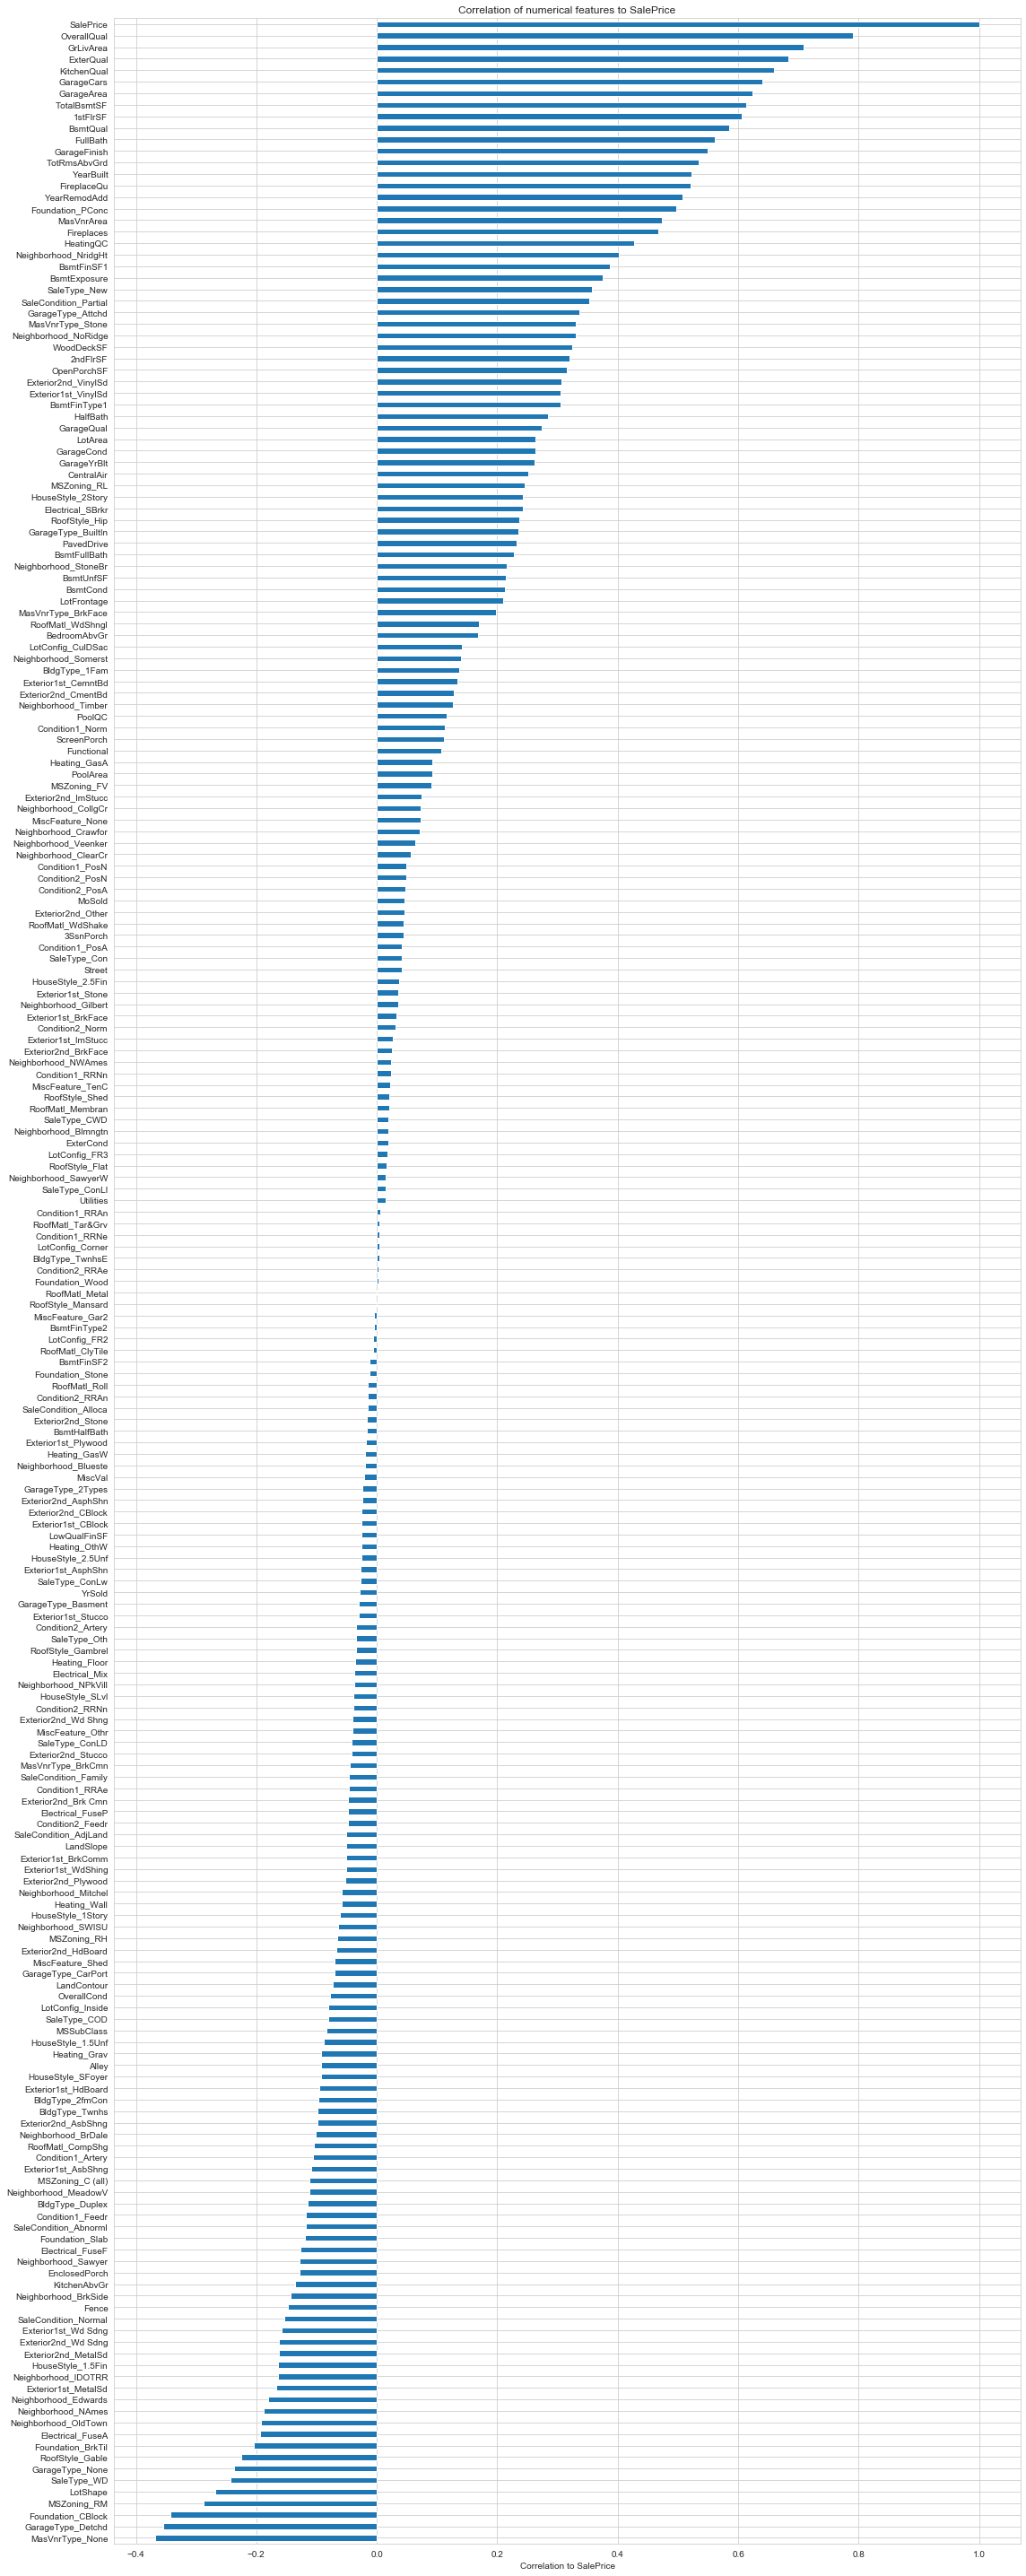

In [56]:
# visualizing the the correlation of all features after data encoding using horizontal bar graph
plt.figure(figsize=(16,40));
corr = df.corr()['SalePrice']

# high_corr = df.corr()['SalePrice'][(abs(df.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)
corr.sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

### Basement - feature engineering

In [57]:
df['BsmtSpace'] = df['BsmtQual'] * df['TotalBsmtSF']

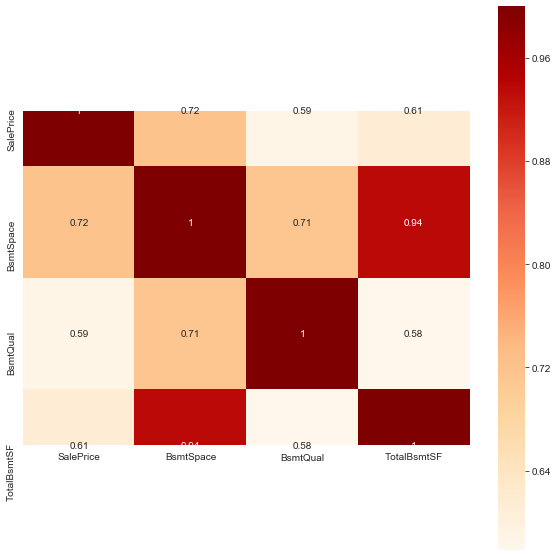

In [58]:
#heatmap visualization of new feature
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(df[['SalePrice', 'BsmtSpace','BsmtQual', 'TotalBsmtSF']].corr(), cbar=True, annot=True, cmap = 'OrRd', square=True)

### Porch - feature engineering

In [59]:
df['hasScreenPorch'] = df['ScreenPorch'].apply(lambda x: 0 if x > 0 else 1)
df['hasEnclosedPorch'] = df['EnclosedPorch'].apply(lambda x: 0 if x > 0 else 1)
df['hasOpenPorchSF'] = df['OpenPorchSF'].apply(lambda x: 0 if x > 0 else 1)
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch']
df['hasPorch'] = df['TotalPorchSF'].apply(lambda x : 0 if x > 0 else 1)

### Surface Area - feature engineering

In [60]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

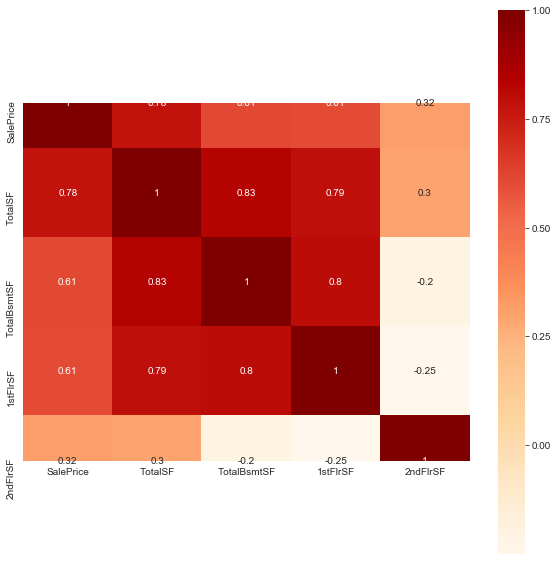

In [61]:
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(df[['SalePrice', 'TotalSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF']].corr(), cbar=True, annot=True, cmap = 'OrRd', square=True)

### has Property - feature engineering

In [62]:
df['hasFireplace'] = df['FireplaceQu'].apply(lambda x : 0 if x == 0 else 1)
df['hasGarage'] = df['GarageArea'].apply(lambda x : 0 if x == 0 else 1)
df['hasBasement'] = df['BsmtExposure'].apply(lambda x : 0 if x == 0 else 1)
df['hasPool'] = df['PoolQC'].apply(lambda x : 0 if x == 0 else 1)
df['hasFence'] = df['Fence'].apply(lambda x : 0 if x == 0 else 1)
df['hasRenovate'] = df ['YearRemodAdd'] - df['YearBuilt']
df['hasRenovate'] = df['hasRenovate'].apply(lambda x: 0 if x == 0 else 1)

### Quality - feature engineering

In [63]:
df['TotalQual'] = df['KitchenQual'] + df['ExterQual'] + df['OverallQual']
df['PaveScore'] = df['PavedDrive'] + df['Alley'] + df['Street']

## Correlation

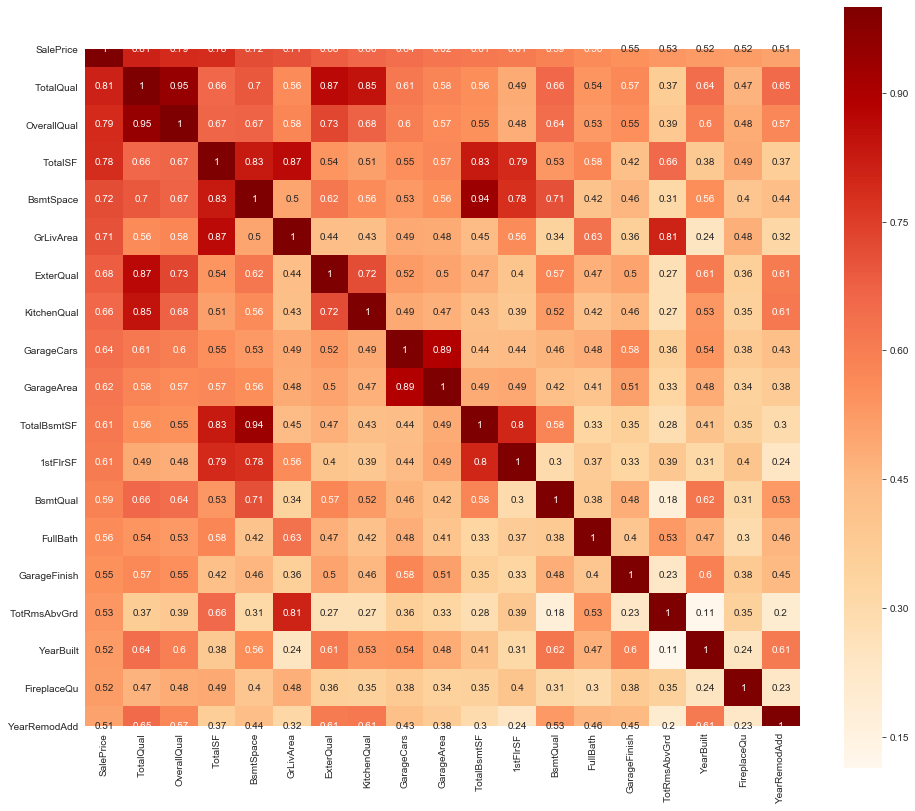

In [64]:
high_corr = df.corr()['SalePrice'][(abs(df.corr()['SalePrice']) > 0.5)].sort_values(ascending = False)
high_corr

fig, axes = plt.subplots(figsize=(16,14))
sns.heatmap(df[high_corr.index].corr(), cbar=True, annot=True, cmap = 'OrRd', square=True)

# Prediction

## Train test split

In [65]:
X_col = df.columns.tolist()
X_col.remove('SalePrice')
y_col = 'SalePrice'

In [66]:
df_train = df[df['SalePrice'].notnull()]
df_test = df[df['SalePrice'].isnull()]

# Import machine learning Library

In [67]:
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.metrics.scorer import neg_mean_squared_error_scorer

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, RidgeCV, ElasticNetCV
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

from scipy.stats import skew
from scipy.special import boxcox1p

## Baseline with Linear Regressor

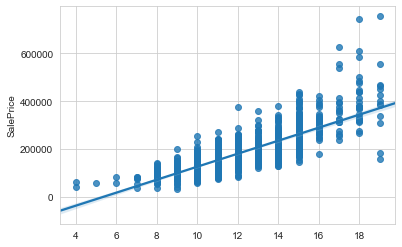

In [68]:
sns.regplot(x = df_train[["TotalQual"]], y = df_train.SalePrice)

In [69]:
X = df_train[df_train["TotalQual"] > 5][["TotalQual"]]
y = df_train[df_train["TotalQual"] > 5].SalePrice
metric = 'neg_mean_squared_log_error'
clf = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.2397 Log Error


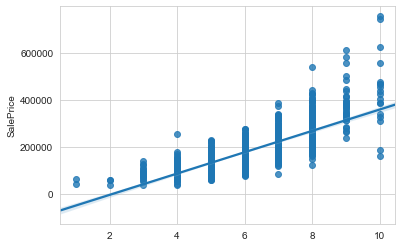

In [70]:
sns.regplot(x = df_train[["OverallQual"]], y = df_train.SalePrice)

In [71]:
X = df_train[df_train["OverallQual"] > 2][["OverallQual"]]
y = df_train[df_train["OverallQual"] > 2].SalePrice
metric = 'neg_mean_squared_log_error'
clf = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.2641 Log Error


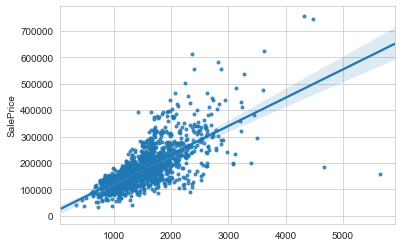

In [72]:
sns.regplot(x = df_train[["GrLivArea"]], y = df_train.SalePrice, marker = '.')

In [194]:
X = df_train[["GrLivArea"]]
y = df_train.SalePrice
metric = 'neg_mean_squared_log_error'
clf = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.2750 Log Error


In [74]:
X = df_train[df_train["GrLivArea"] < 4000][["GrLivArea"]]
y = df_train[df_train["GrLivArea"] < 4000].SalePrice
metric = 'neg_mean_squared_log_error'
clf = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.2715 Log Error


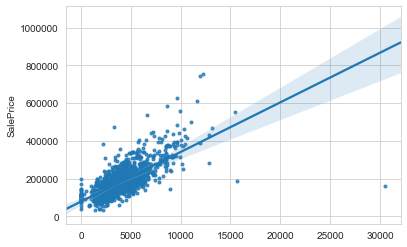

In [75]:
sns.regplot(x = df_train[["BsmtSpace"]], y = df_train.SalePrice, marker = '.')

In [76]:
X = df_train[["BsmtSpace"]]
y = df_train.SalePrice
clf = LinearRegression()


metric = 'neg_mean_squared_log_error'
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.2792 Log Error


In [77]:
X = df_train[df_train["BsmtSpace"] < 30000][["BsmtSpace"]]
y = df_train[df_train["BsmtSpace"] < 30000].SalePrice
metric = 'neg_mean_squared_log_error'
clf = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.2770 Log Error


In [78]:
high_corr_col = high_corr.index.tolist()
high_corr_col.remove('SalePrice')

In [79]:
X = df_train[high_corr_col].values

y = np.log1p(df_train.SalePrice)
metric = 'neg_mean_squared_error'

clf = make_pipeline(SimpleImputer(), StandardScaler(), LinearRegression())
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.1660 Log Error


# Feature Selection with XGBoost

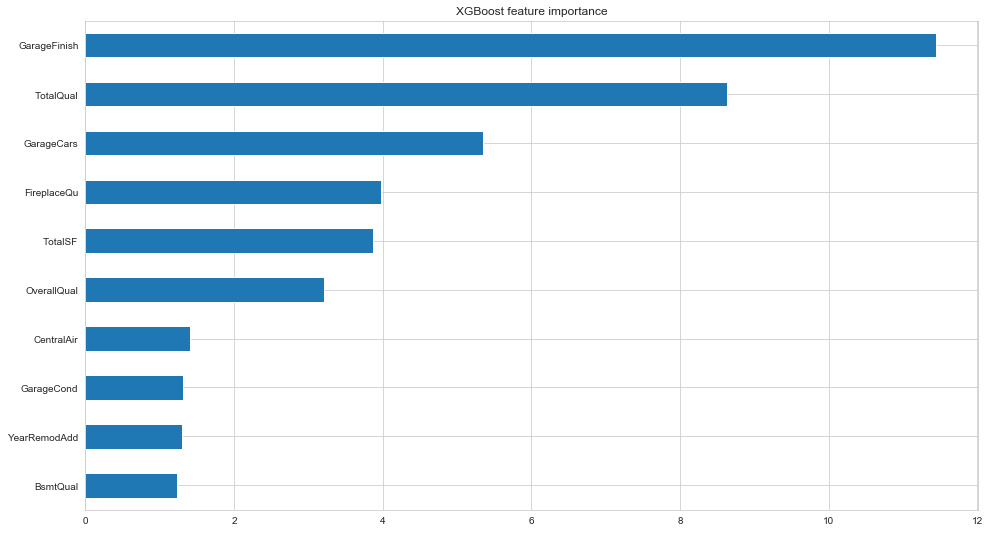

In [80]:
X = df_train[df_train.GrLivArea < 4000].drop(["SalePrice"], axis=1).copy()
y = np.log1p(df_train[df_train.GrLivArea < 4000].SalePrice)

# again we apply the boxcox transformation
sk = pd.DataFrame(X.iloc[:, :60].skew(), columns=["skewness"])
sk = sk[sk.skewness > .75]
for feature_ in sk.index:
    X[feature_] = boxcox1p(X[feature_], 0.15)

clf = xgb.XGBRegressor(objective="reg:squarederror", n_jobs=-1)
model = clf.fit(X,y)
score = model.get_booster().get_score(importance_type='gain')

df_gain = pd.DataFrame(score,index=['gain_']).T
df_gain.sort_values("gain_", ascending=True, inplace=True)

plt.figure(figsize=(16,9))
df_gain.iloc[81:, :].gain_.plot(kind="barh")
plt.title(f"XGBoost feature importance")
plt.show()

In [81]:
classifiers = [
               Ridge(), 
               Lasso(), 
               ElasticNet(),
               xgb.XGBRegressor(objective="reg:squarederror"),
]

clf_names = [
            "ridge      ",
            "lasso      ",
            "elastic    ",
            "xgboost    ",
]

# Baseline with every column

In [82]:
X = df_train.drop(["SalePrice"], axis=1)
y = np.log1p(df_train.SalePrice)
metric = 'neg_mean_squared_error'

for clf_name, clf in zip(clf_names, classifiers):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f}")

ridge       0.1424
lasso       0.1963
elastic     0.1886
xgboost     0.1284


In [83]:
X = df_train[df_train.GrLivArea < 4000].drop(["SalePrice"], axis=1)
y = np.log1p(df_train[df_train.GrLivArea < 4000].SalePrice)
metric = 'neg_mean_squared_error'

for clf_name, clf in zip(clf_names, classifiers):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f}")

ridge       0.1183
lasso       0.1666
elastic     0.1568
xgboost     0.1210


# feature selection based on xgboost

In [84]:
X = df_train[df_gain.index.tolist()]
y = np.log1p(df_train.SalePrice)
metric = 'neg_mean_squared_error'

for clf_name, clf in zip(clf_names, classifiers):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f}")

ridge       0.1402
lasso       0.1963
elastic     0.1886
xgboost     0.1305


In [85]:
X = df_train[df_train.GrLivArea < 4000][df_gain.index.tolist()]
y = np.log1p(df_train[df_train.GrLivArea < 4000].SalePrice)
metric = 'neg_mean_squared_error'

for clf_name, clf in zip(clf_names, classifiers):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f}")

ridge       0.1118
lasso       0.1666
elastic     0.1569
xgboost     0.1223


In [86]:
gains = np.arange(0,0.5,0.01)
MSLE = {}

for gain in gains:
    X_gain = df_gain[df_gain['gain_'] > gain].index.tolist()
    X = df_train[df_train.GrLivArea < 4000][X_gain]
    y = np.log1p(df_train[df_train.GrLivArea < 4000].SalePrice)
    metric = 'neg_mean_squared_error'
    
    for clf_name, clf in zip(clf_names, classifiers):
        kfold = KFold(n_splits=5, shuffle=True, random_state=1)
        score = np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean()
        
        if clf_name in MSLE:
            MSLE[clf_name].append(score)
        else:
            MSLE[clf_name] = [] 
            MSLE[clf_name].append(score)

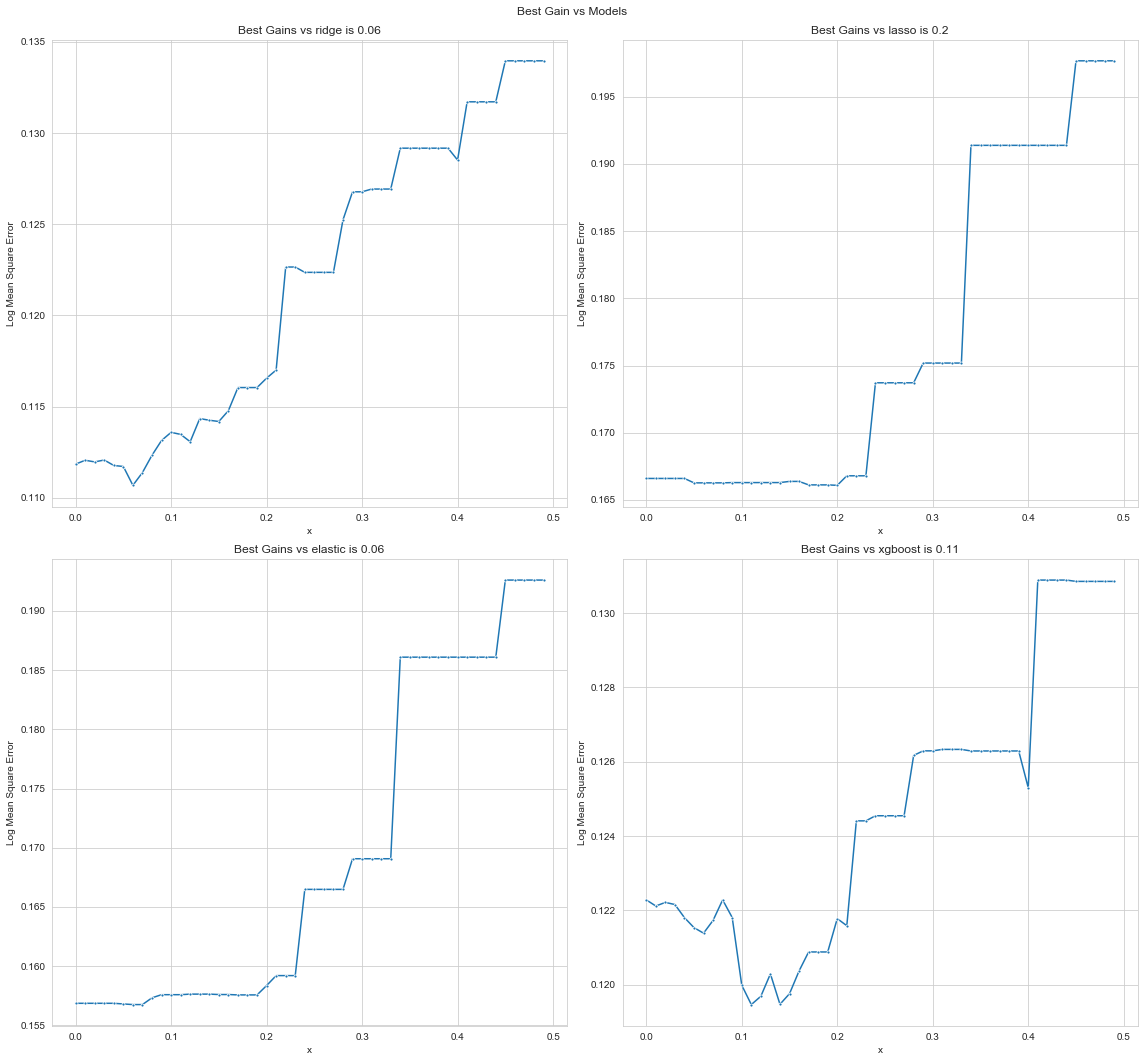

In [87]:
best_gain = {}

fig, ax = plt.subplots(2, 2, figsize=(16,15))

for idx,col in enumerate(MSLE):
    sns.lineplot(np.arange(0,0.5,0.01) , MSLE[col], marker='.', ax=ax[idx//2, idx%2])  
    
    gain = MSLE[col].index(min(MSLE[col]))*0.01
    
    ax[idx//2,idx%2].set_title('Best Gains vs ' + col.strip() + ' is ' + str(gain))
    ax[idx//2,idx%2].set_ylabel('Log Mean Square Error')
    ax[idx//2,idx%2].set_xlabel('x')
    
    best_gain[col.strip()] = gain
    
fig.suptitle('Best Gain vs Models')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

In [88]:
# comparing result with feature selection using gain and removing outliers
y = np.log1p(df_train[df_train.GrLivArea < 4000].SalePrice)
metric = 'neg_mean_squared_error'

for clf_name, clf in zip(clf_names, classifiers):
    X_gain = df_gain[df_gain['gain_'] > best_gain[clf_name.strip()]].index.tolist()
    X = df_train[df_train.GrLivArea < 4000][X_gain]
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.5f}")

ridge       0.11068
lasso       0.16609
elastic     0.15675
xgboost     0.11946


# Hyperparameter Tuning

In [89]:
best_gain

{'ridge': 0.06, 'lasso': 0.2, 'elastic': 0.06, 'xgboost': 0.11}

## Ridge Regression

In [90]:
X_gain = df_gain[df_gain['gain_'] > best_gain['ridge']].index.tolist()
X = df_train[df_train.GrLivArea < 4000][X_gain]
y = np.log1p(df_train[df_train.GrLivArea < 4000].SalePrice)

### HyperParameter: alpha

In [91]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
metric = 'neg_mean_squared_error'
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

cv_ridge = [np.sqrt(-cross_val_score(Ridge(alpha = alpha).fit(X, y), X, y, cv=kfold, scoring=metric)).mean()
          for alpha in alphas]
 
print("Smallest MSLE is: ", min(cv_ridge), "")
print("Best Alpha is: ", alphas[cv_ridge.index(min(cv_ridge))], "")

Smallest MSLE is:  0.11026089799544929 
Best Alpha is:  3 


Text(0, 0.5, 'msle')

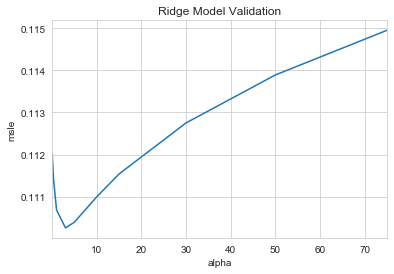

In [92]:
#plot Ridge alpha values
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Ridge Model Validation")
plt.xlabel("alpha")
plt.ylabel("msle")

### Predicting test set with ridge regression

In [93]:
ridge = Ridge(alpha = 3).fit(X, y)
df_test['SalePriceRidge'] = ridge.predict(df_test[X_gain])
df_test['SalePriceRidge'] = df_test['SalePriceRidge'].apply(np.expm1)

## Lasso Regression

In [94]:
X_gain = df_gain[df_gain['gain_'] > best_gain['lasso']].index.tolist()
X = df_train[df_train.GrLivArea < 4000][X_gain]
y = np.log1p(df_train[df_train.GrLivArea < 4000].SalePrice)

### HyperParameter: alpha

In [95]:
from sklearn.linear_model import LassoCV
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
metric = 'neg_mean_squared_error'

#new alpha values
alphas = np.arange(0.0001,0.1,0.0001).tolist()

cv_lasso = [np.sqrt(-cross_val_score(Lasso(alpha = alpha).fit(X, y), X, y, cv=kfold, scoring=metric)).mean()
          for alpha in alphas]

print("Smallest MSLE is: ", min(cv_lasso), "")
print("Best Alpha is: ", alphas[cv_lasso.index(min(cv_lasso))], "")

Smallest MSLE is:  0.11618203820920998 
Best Alpha is:  0.0005 


Text(0, 0.5, 'MSLE')

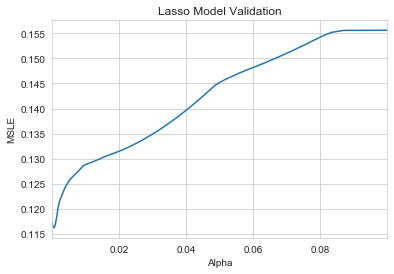

In [96]:
#plot Ridge alpha values
model_lasso = pd.Series(cv_lasso, index = alphas)
model_lasso.plot(title = "Lasso Model Validation")
plt.xlabel("Alpha")
plt.ylabel("MSLE")

In [97]:
model_lasso = Lasso(alpha = 0.0005).fit(X, y)
df_test['SalePriceLasso'] = model_lasso.predict(df_test[X_gain])
df_test['SalePriceLasso'] = df_test['SalePriceLasso'].apply(np.expm1)

## ElasticNet

### HyperParameter: l1_ratio

In [98]:
X_gain = df_gain[df_gain['gain_'] > best_gain['elastic']].index.tolist()
X = df_train[df_train.GrLivArea < 4000][X_gain]
y = np.log1p(df_train[df_train.GrLivArea < 4000].SalePrice)

cv_model = ElasticNetCV(l1_ratio=np.arange(0.1,0.3,0.01).tolist(), 
                        normalize=True,max_iter=2000, cv=10, n_jobs=-1)

cv_model.fit(X, y)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.11, 0.12, 0.13, 0.13999999999999999,
                       0.14999999999999997, 0.15999999999999998,
                       0.16999999999999998, 0.17999999999999997,
                       0.18999999999999995, 0.19999999999999996,
                       0.20999999999999996, 0.21999999999999995,
                       0.22999999999999995, 0.23999999999999994,
                       0.24999999999999992, 0.2599999999999999,
                       0.2699999999999999, 0.2799999999999999,
                       0.2899999999999999],
             max_iter=2000, n_alphas=100, n_jobs=-1, normalize=True,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [99]:
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal l1_ratio: 0.290
Number of iterations 125


In [100]:
print(np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean())

0.12138547743718549


In [101]:
df_test['SalePriceElastic'] = cv_model.predict(df_test[X_gain])
df_test['SalePriceElastic'] = df_test['SalePriceElastic'].apply(np.expm1)

## XGBoost

In [179]:
X_gain = df_gain[df_gain['gain_'] > best_gain['xgboost']].index.tolist()
X = df_train[df_train.GrLivArea < 4000][X_gain]
y = np.log1p(df_train[df_train.GrLivArea < 4000].SalePrice)

In [180]:
xgbreg = xgb.XGBRegressor(objective="reg:squarederror")

In [181]:
print(np.sqrt(-cross_val_score(xgbreg, X, y, cv=kfold, scoring=metric)).mean())

0.11946422835299975


### Tuning depth and min_child_weight

In [157]:
param_test1 = {
 'max_depth':range(2,6,2),
 'min_child_weight': np.arange(0.1,2,0.1).tolist()
}

gsearch1 = GridSearchCV(estimator = XGBRegressor(objective= 'reg:squarederror',
                                                 learning_rate =0.05, n_estimators=1000, max_depth=2,
                                                 gamma=0, subsample=0.5, colsample_bytree=0.5,
                                                 nthread=4, seed=27), 
                                                 param_grid = param_test1,n_jobs=4,iid=False, cv=5)

gsearch1.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_s...
             param_grid={'max_depth': range(2, 6, 2),
                         'min_child_weight': [0.1, 0.2, 0.30000000000000004,
                                              0.4, 0.5, 0.6, 0.7000000000000001,
                                              0.8, 0.9, 1.0, 1.1,
                                              1.2

In [158]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 2, 'min_child_weight': 0.1}, 0.9184791281094089)

### Tuning gamma

In [177]:
param_test2 = {
 'gamma': np.arange(0, 1, 0.01).tolist()
}

gsearch2 = GridSearchCV(estimator = XGBRegressor(objective= 'reg:squarederror',
                                                 max_depth=2, min_child_weight = 0.1,
                                                 learning_rate =0.05, n_estimators=1000, 
                                                 subsample=0.8, colsample_bytree=0.8,
                                                  nthread=4, seed=27), 
                                                 param_grid = param_test2,n_jobs=4,iid=False, cv=5)
gsearch2.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=2,
                                    min_child_weight=0.1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random...ambda=1,
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'gamma': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.07, 0.08, 0.09, 0.1, 0.11, 0.

In [178]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.9184791281094089)

### Tuning subsample and colsample

In [161]:
param_test3 = {
 'subsample':np.arange(0.4,0.6,0.02).tolist(),
 'colsample_bytree':np.arange(0.4,0.6,0.02).tolist()
}

gsearch3 = GridSearchCV(estimator = XGBRegressor(objective= 'reg:squarederror',
                                                 max_depth=2, min_child_weight = 0.1,
                                                 gamma=0,
                                                 learning_rate =0.05, n_estimators=1000, 
                                                  nthread=4, seed=27), 
                                                 param_grid = param_test3,n_jobs=4,iid=False, cv=5)
gsearch3.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=2,
                                    min_child_weight=0.1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_s...
                                              0.5200000000000001,
                                              0.5400000000000001,
                                              0.5600000000000002,
                                              0.5800000000000002],
                         'subsample': [0.4, 0.4200000000000000

In [162]:
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.4, 'subsample': 0.4600000000000001},
 0.9208610512659023)

### Tuning Regularization Parameters

In [182]:
param_test4 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch4 = GridSearchCV(estimator = XGBRegressor(objective= 'reg:squarederror',
                                                 max_depth=2, min_child_weight = 0.1,
                                                 gamma=0, colsample_bytree= 0.4,
                                                 subsample= 0.46, learning_rate =0.05, n_estimators=1000, 
                                                 nthread=4, seed=27), 
                                                 param_grid = param_test4,n_jobs=4,iid=False, cv=5)
gsearch4.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.4, gamma=0,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=2,
                                    min_child_weight=0.1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=0.46, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
             pre_dispatch='2*n_jobs', refit=True,

In [183]:
gsearch4.best_params_, gsearch4.best_score_

({'reg_alpha': 0.01}, 0.921092410590617)

### Tuning learning rate and number of estimators

In [184]:
param_test5 = {
 'learning_rate': np.arange(0.01, 0.05, 0.01).tolist(),
 'n_estimators': [1000,2000,3000]
}

gsearch5 = GridSearchCV(estimator = XGBRegressor(objective= 'reg:squarederror',
                                                 max_depth=2, min_child_weight = 0.1,
                                                 gamma=0, colsample_bytree= 0.4,
                                                 subsample= 0.46, reg_alpha= 0.01,
                                                 nthread=4, seed=27), 
                                                 param_grid = param_test5,n_jobs=4,iid=False, cv=5)
gsearch5.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.4, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=2,
                                    min_child_weight=0.1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0.01,
                                    reg_lambda=1, scale_pos_weight=1, seed=27,
                                    silent=None, subsample=0.46, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'n_estimators': [1000,

In [185]:
gsearch5.best_params_, gsearch5.best_score_

({'learning_rate': 0.03, 'n_estimators': 2000}, 0.9216109690788601)

### Final output

In [186]:
xgbreg = XGBRegressor(objective= 'reg:squarederror',
                         max_depth=2, min_child_weight = 0.1,
                         gamma=0, colsample_bytree= 0.4,
                         subsample= 0.46, reg_alpha= 0.01,
                         learning_rate = 0.03, n_estimators = 2000,
                         nthread=4, seed=27)

In [187]:
print(np.sqrt(-cross_val_score(xgbreg, X, y, cv=kfold, scoring=metric)).mean())

0.11069449092516459


In [188]:
xgbreg.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=2, min_child_weight=0.1, missing=None, n_estimators=2000,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.46, verbosity=1)

In [189]:
df_test['SalePriceXGB'] = xgbreg.predict(df_test[X_gain])
df_test['SalePriceXGB'] = df_test['SalePriceXGB'].apply(np.expm1)

# Generate CSV for kaggle submission (Please only run one at a time to prevent overwriting)

In [147]:
submission = pd.read_csv('./test.csv')

In [191]:
submission = pd.DataFrame({'Id': submission.Id.values, 'SalePrice': df_test['SalePriceRidge']})
submission.to_csv(f"submission.csv", index=False)

In [192]:
submission = pd.DataFrame({'Id': submission.Id.values, 'SalePrice': df_test['SalePriceLasso']})
submission.to_csv(f"submission.csv", index=False)

In [193]:
submission = pd.DataFrame({'Id': submission.Id.values, 'SalePrice': df_test['SalePriceElastic']})
submission.to_csv(f"submission.csv", index=False)

In [190]:
submission = pd.DataFrame({'Id': submission.Id.values, 'SalePrice': df_test['SalePriceXGB']})
submission.to_csv(f"submission.csv", index=False)